# IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support

# IMPORT DATASET

In [2]:
df = pd.read_csv('diabetics_data.csv')

In [3]:
df.head()

Unnamed: 0             Unnamed: 1 Unnamed: 2 Unnamed: 3  \
0                   Name  Fasting Blood Glucose        Hct        Hgb   
1   ABDUL RAZAQ ADEKUNLE                    150       46.2       15.2   
2  ABDULKADIR AISHA UMAR                    165       37.2       12.3   
3   ABDULLAHI UMAR YELWA                    169         26        8.6   
4  ABDULLAHI UMAR YELWA                     190       28.1        9.2   

  Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  \
0        Mch       Mchc        Mcv        Pdw        Plt        Rbc   
1       33.3       32.9        101       16.9        133       4.57   
2       34.6        NaN      104.4        NaN        NaN       3.56   
3         29       33.1       87.4       15.6        376       2.97   
4       28.7       32.8       87.4       15.8        393       3.21   

  Unnamed: 10 Unnamed: 11 Unnamed: 12 Unnamed: 13  
0      Rdw-Cv      Rdw-Sd         Wbc      Result  
1        12.3        46.2        4.92    positive  
2         NaN         NaN         NaN    positive  
3        15.9        51.7       18.42    positive  
4        16.5        53.6       12.81    positive

In [4]:
df.columns = df.iloc[0]

In [5]:
df = df.drop(df.index[0])

In [6]:
df.head()

0                   Name Fasting Blood Glucose   Hct   Hgb   Mch  Mchc    Mcv  \
1   ABDUL RAZAQ ADEKUNLE                   150  46.2  15.2  33.3  32.9    101   
2  ABDULKADIR AISHA UMAR                   165  37.2  12.3  34.6   NaN  104.4   
3   ABDULLAHI UMAR YELWA                   169    26   8.6    29  33.1   87.4   
4  ABDULLAHI UMAR YELWA                    190  28.1   9.2  28.7  32.8   87.4   
5       ABDULLLAHI USMAN                   200  44.6  14.7  33.1  32.9  100.5   

0   Pdw  Plt   Rbc Rdw-Cv Rdw-Sd    Wbc    Result  
1  16.9  133  4.57   12.3   46.2   4.92  positive  
2   NaN  NaN  3.56    NaN    NaN    NaN  positive  
3  15.6  376  2.97   15.9   51.7  18.42  positive  
4  15.8  393  3.21   16.5   53.6  12.81  positive  
5  15.9  211  4.44   13.1     49   5.64  positive

In [7]:
df.describe()

0             Name Fasting Blood Glucose   Hct   Hgb  Mch  Mchc   Mcv  Pdw  \
count          469                   469   452   453  452   451   453  451   
unique         376                   156   191   111  138    90   232   38   
top     MALA MUSTI                    69  39.4  12.8   34  33.1  98.5   16   
freq             3                     9    10    21   13    21     6   55   

0       Plt   Rbc Rdw-Cv Rdw-Sd   Wbc    Result  
count   450   452    450    451   451       469  
unique  242   195     95    178   314         2  
top     220  4.33   13.3     49  5.64  positive  
freq      8     8     25     10     5       303

In [8]:
df.count()

0
Name                     469
Fasting Blood Glucose    469
Hct                      452
Hgb                      453
Mch                      452
Mchc                     451
Mcv                      453
Pdw                      451
Plt                      450
Rbc                      452
Rdw-Cv                   450
Rdw-Sd                   451
Wbc                      451
Result                   469
dtype: int64

In [9]:
df.isnull().values.ravel().sum()

193

In [10]:
columns = list(df.columns)

In [11]:
columns

['Name',
 'Fasting Blood Glucose',
 'Hct',
 'Hgb',
 'Mch',
 'Mchc',
 'Mcv',
 'Pdw',
 'Plt',
 'Rbc',
 'Rdw-Cv',
 'Rdw-Sd',
 'Wbc',
 'Result']

# Fill missing values with mean

In [12]:
df = df.fillna(df.mean())

In [13]:
df.describe()

0             Name Fasting Blood Glucose   Hct   Hgb  Mch  Mchc   Mcv  Pdw  \
count          469                   469   452   453  452   451   453  451   
unique         376                   156   191   111  138    90   232   38   
top     MALA MUSTI                    69  39.4  12.8   34  33.1  98.5   16   
freq             3                     9    10    21   13    21     6   55   

0       Plt   Rbc Rdw-Cv Rdw-Sd   Wbc    Result  
count   450   452    450    451   451       469  
unique  242   195     95    178   314         2  
top     220  4.33   13.3     49  5.64  positive  
freq      8     8     25     10     5       303

# VISUALIZATION

In [14]:
pd.crosstab([df['Fasting Blood Glucose']],df['Result']).style.background_gradient(cmap='summer_r')

In [15]:
_min = df['Fasting Blood Glucose'].min()
_max = df['Fasting Blood Glucose'].max()
print(f"Min fasting blood sugar is {_min} and maximum is {_max}")

Min fasting blood sugar is 107.26 and maximum is 97.13


In [16]:
df["Fasting Blood Glucose"] = pd.to_numeric(df["Fasting Blood Glucose"])


In [17]:
df['Fasting Blood Glucose_band'] = ""

In [18]:
#divide Fasting Blood Glucose into 5 bands and visualize
df['Fasting Blood Glucose_band'] = pd.qcut(df['Fasting Blood Glucose'], 5, labels = False)
pd.qcut(df['Fasting Blood Glucose'], q=5)

1                 (125.45, 178.7]
2                 (125.45, 178.7]
3                 (125.45, 178.7]
4                  (178.7, 249.0]
5                  (178.7, 249.0]
                  ...            
465    (60.199000000000005, 79.2]
466    (60.199000000000005, 79.2]
467                (79.2, 125.45]
468                (79.2, 125.45]
469    (60.199000000000005, 79.2]
Name: Fasting Blood Glucose, Length: 469, dtype: category
Categories (5, interval[float64]): [(60.199000000000005, 79.2] < (79.2, 125.45] < (125.45, 178.7] < (178.7, 249.0] < (249.0, 412.0]]

# Fasting Blood Glucose VS Result

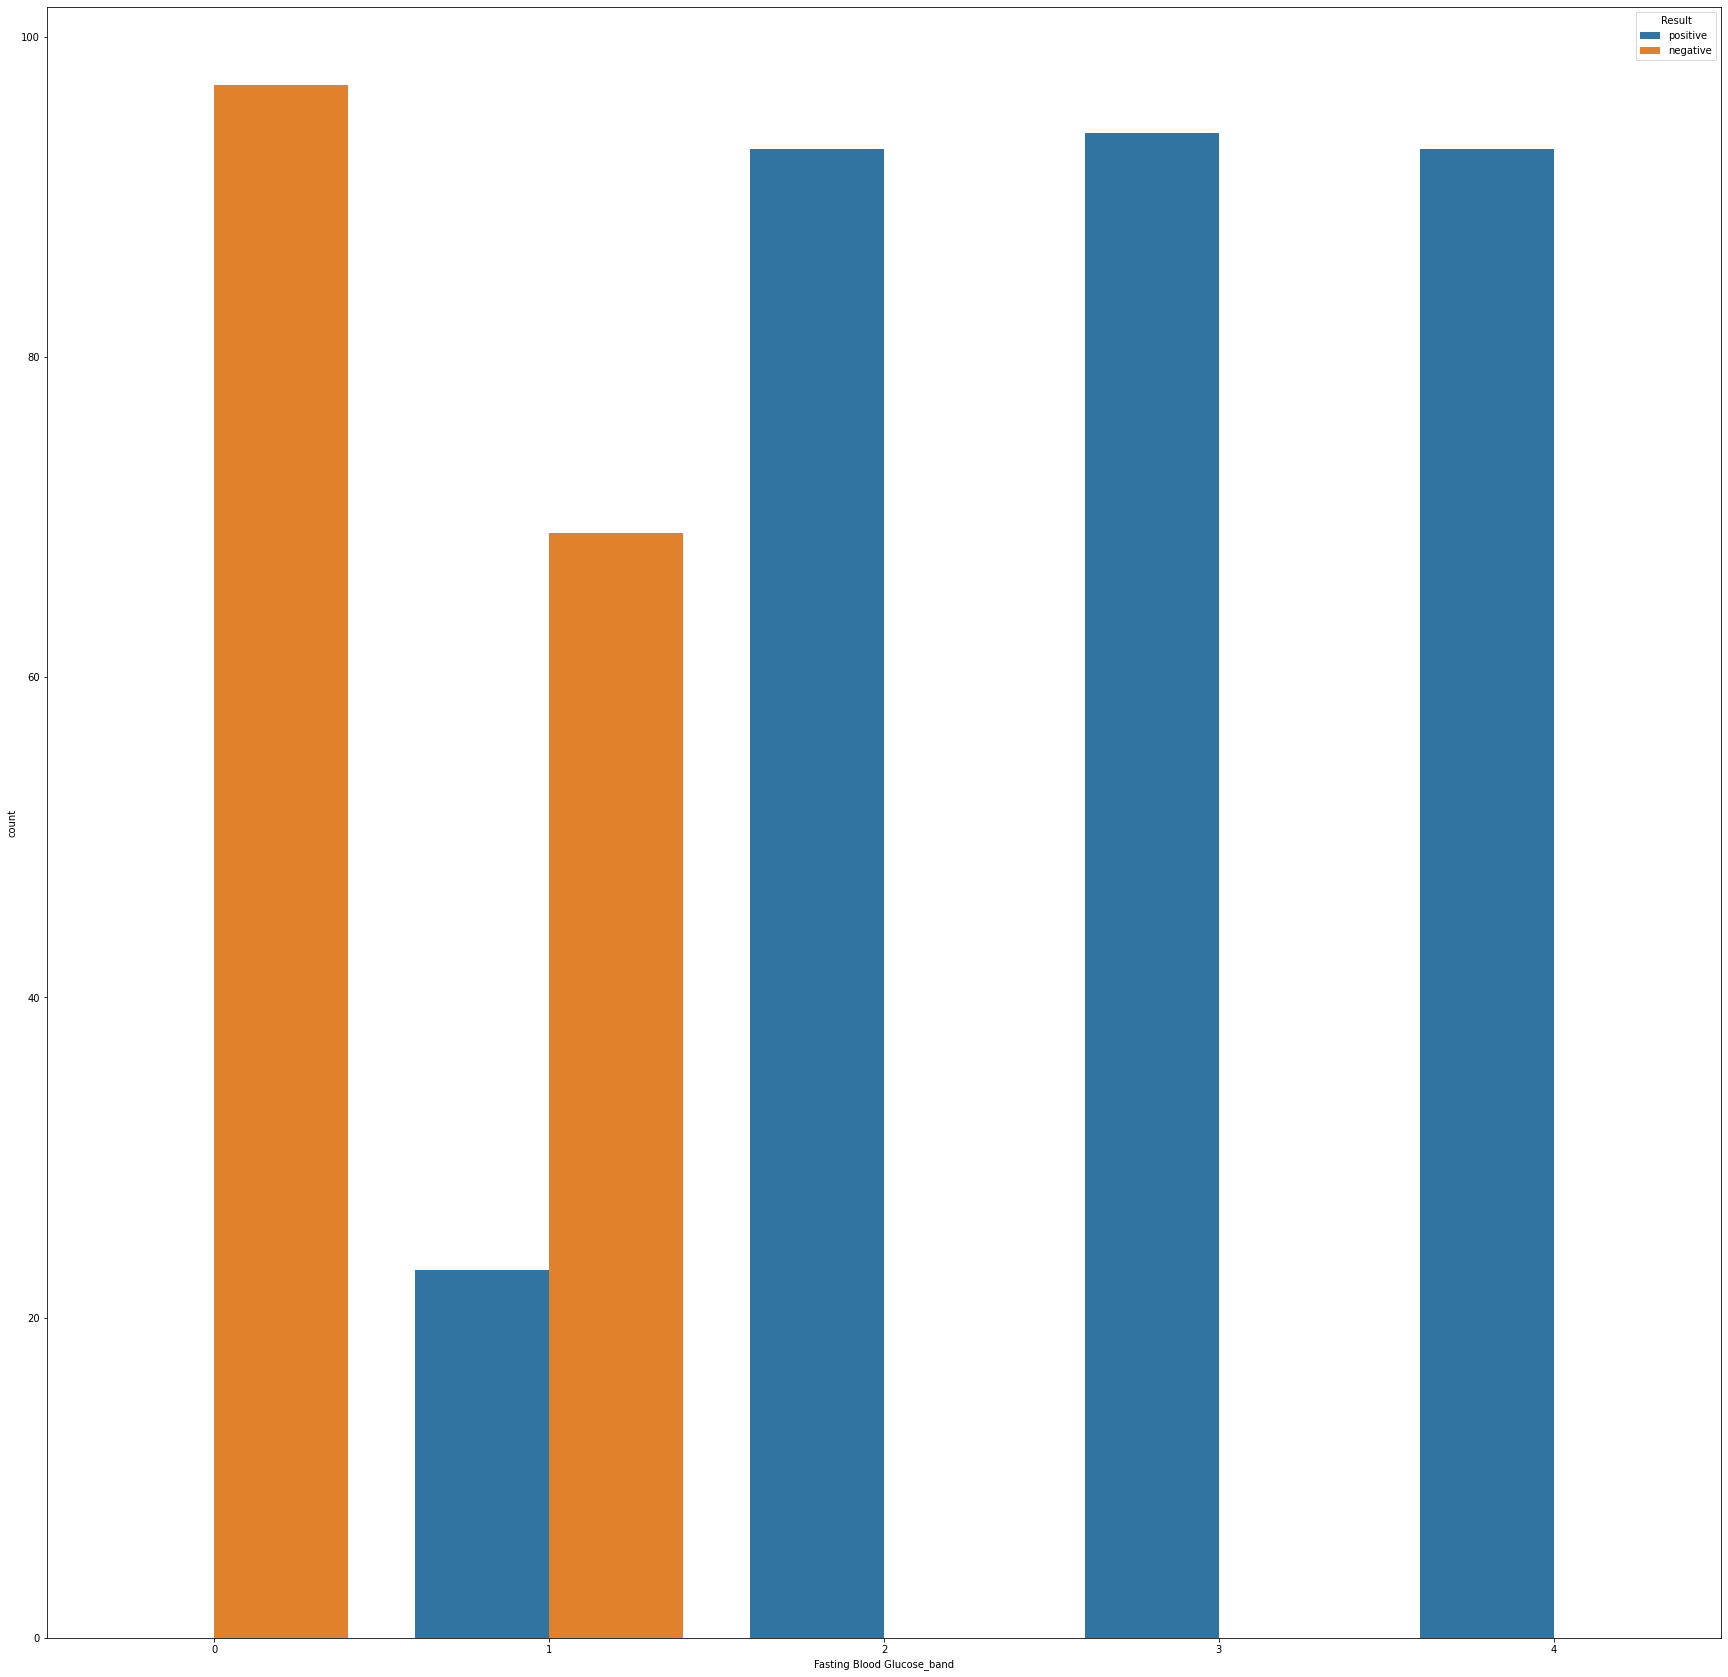

In [19]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['Fasting Blood Glucose_band'],hue='Result',data=df)
plt.show()

In [20]:
pd.crosstab([df['Hct']],df['Result']).style.background_gradient(cmap='summer_r')

In [21]:
df["Hct"] = pd.to_numeric(df["Hct"])

In [22]:
_min = df['Hct'].min()
_max = df['Hct'].max()
print(f"Min Hct is {_min} and maximum is {_max}")

Min Hct is 21.8 and maximum is 57.4


In [23]:
#divide Hct into 5 bands and visualize
df['Hct_band'] = pd.qcut(df['Hct'], 5, labels = False)
pd.qcut(df['Hct'], q=5)

1         (43.4, 57.4]
2       (36.04, 38.82]
3      (21.799, 36.04]
4      (21.799, 36.04]
5         (43.4, 57.4]
            ...       
465      (40.76, 43.4]
466     (36.04, 38.82]
467     (36.04, 38.82]
468       (43.4, 57.4]
469     (38.82, 40.76]
Name: Hct, Length: 469, dtype: category
Categories (5, interval[float64]): [(21.799, 36.04] < (36.04, 38.82] < (38.82, 40.76] < (40.76, 43.4] < (43.4, 57.4]]

# Hct vs Result

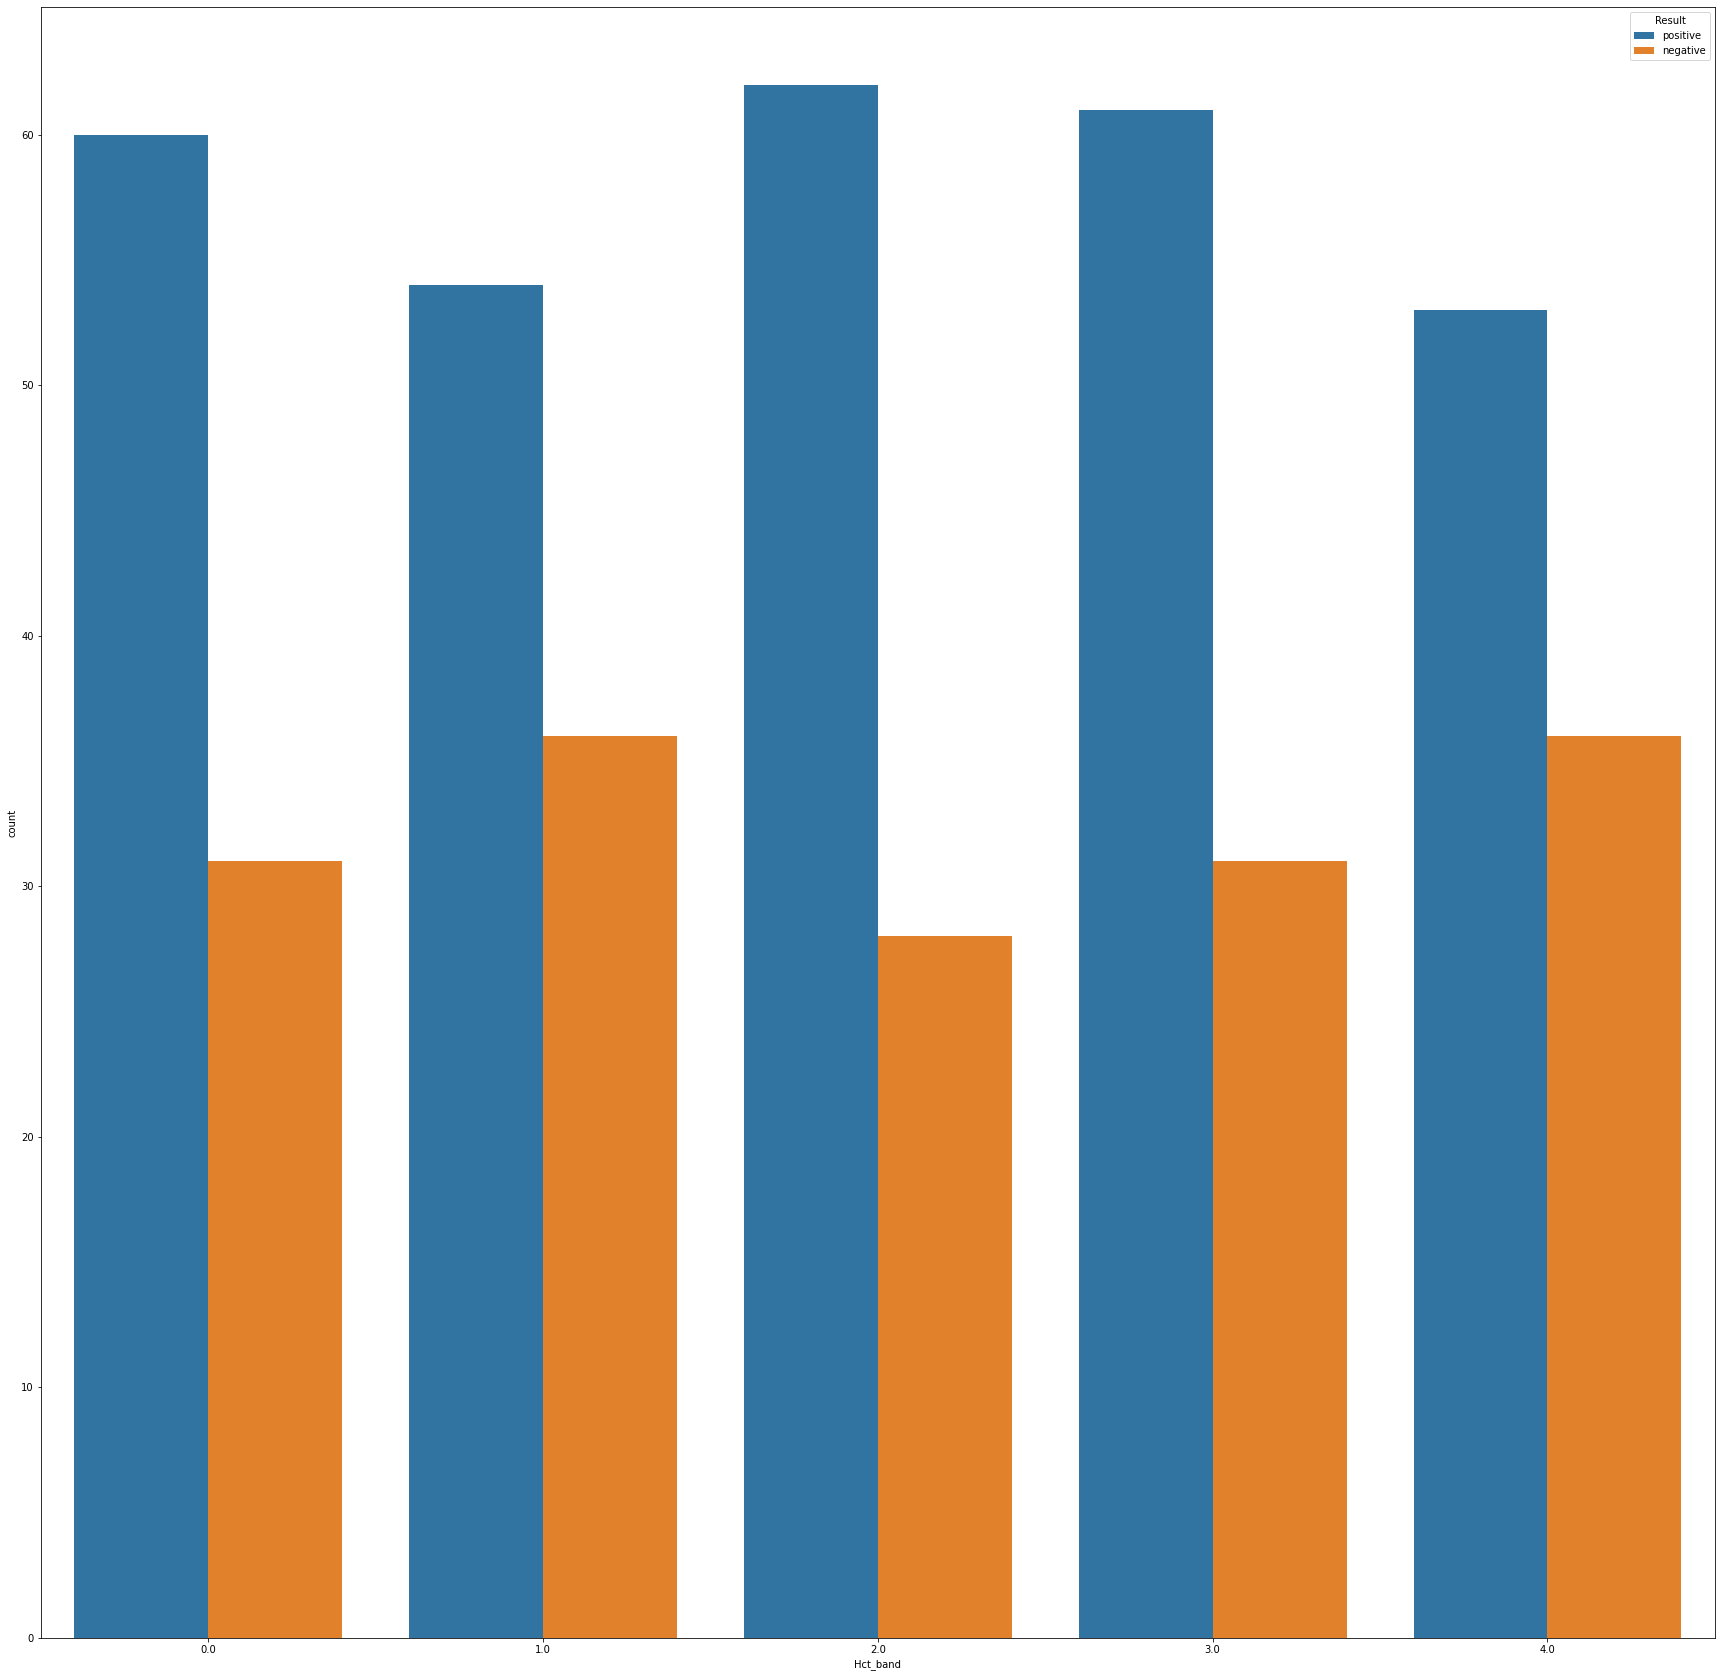

In [24]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['Hct_band'],hue='Result',data=df)
plt.show()

In [25]:
pd.crosstab([df['Hgb']],df['Result']).style.background_gradient(cmap='summer_r')

In [26]:
df["Hgb"] = pd.to_numeric(df["Hgb"])

In [27]:
_min = df['Hgb'].min()
_max = df['Hgb'].max()
print(f"Min Hgb is {_min} and maximum is {_max}")

Min Hgb is 7.0 and maximum is 18.0


In [28]:
#divide Hct into 5 bands and visualize
df['Hgb_band'] = pd.qcut(df['Hgb'], 5, labels = False)
pd.qcut(df['Hgb'], q=5)

1         (14.3, 18.0]
2       (11.513, 12.7]
3      (6.999, 11.513]
4      (6.999, 11.513]
5         (14.3, 18.0]
            ...       
465       (14.3, 18.0]
466     (11.513, 12.7]
467     (11.513, 12.7]
468       (13.2, 14.3]
469       (12.7, 13.2]
Name: Hgb, Length: 469, dtype: category
Categories (5, interval[float64]): [(6.999, 11.513] < (11.513, 12.7] < (12.7, 13.2] < (13.2, 14.3] < (14.3, 18.0]]

# Hgb vs Result

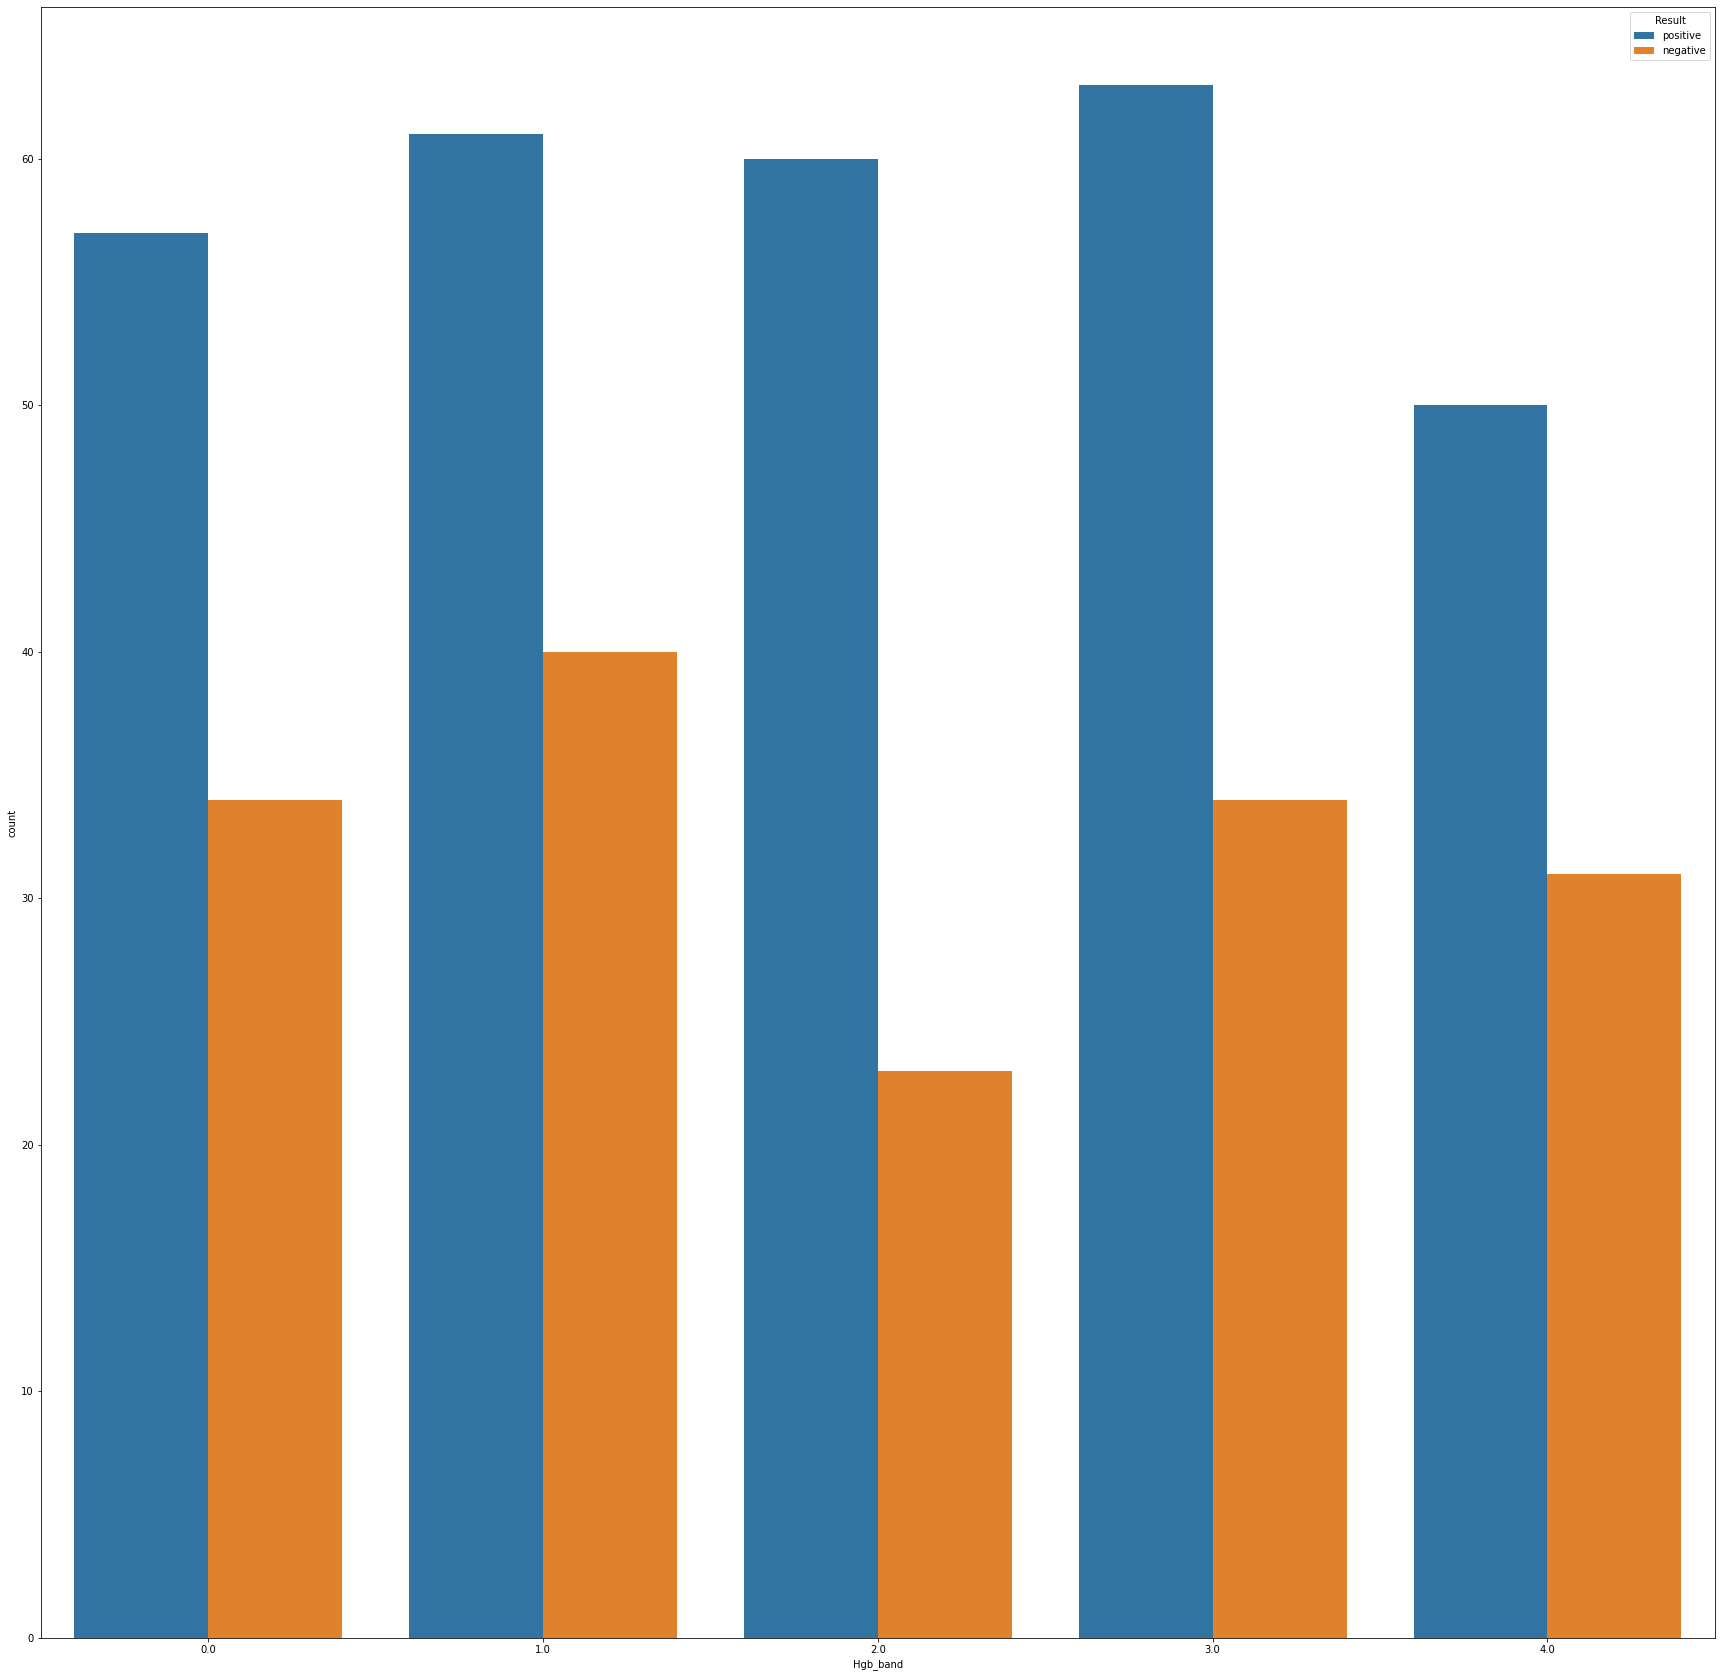

In [29]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['Hgb_band'],hue='Result',data=df)
plt.show()

In [30]:
pd.crosstab([df['Mch']],df['Result']).style.background_gradient(cmap='summer_r')

In [31]:
df["Mch"] = pd.to_numeric(df["Mch"])

In [32]:
_min = df['Mch'].min()
_max = df['Mch'].max()
print(f"Min Mch is {_min} and maximum is {_max}")

Min Mch is 20.5 and maximum is 42.9


In [33]:
#divide Hct into 5 bands and visualize
df['Mch_band'] = pd.qcut(df['Mch'], 5, labels = False)
pd.qcut(df['Mch'], q=5)

1       (32.18, 34.0]
2        (34.0, 42.9]
3      (20.499, 29.3]
4      (20.499, 29.3]
5       (32.18, 34.0]
            ...      
465     (30.7, 32.18]
466      (34.0, 42.9]
467      (29.3, 30.7]
468    (20.499, 29.3]
469      (34.0, 42.9]
Name: Mch, Length: 469, dtype: category
Categories (5, interval[float64]): [(20.499, 29.3] < (29.3, 30.7] < (30.7, 32.18] < (32.18, 34.0] < (34.0, 42.9]]

# Mch vs Result

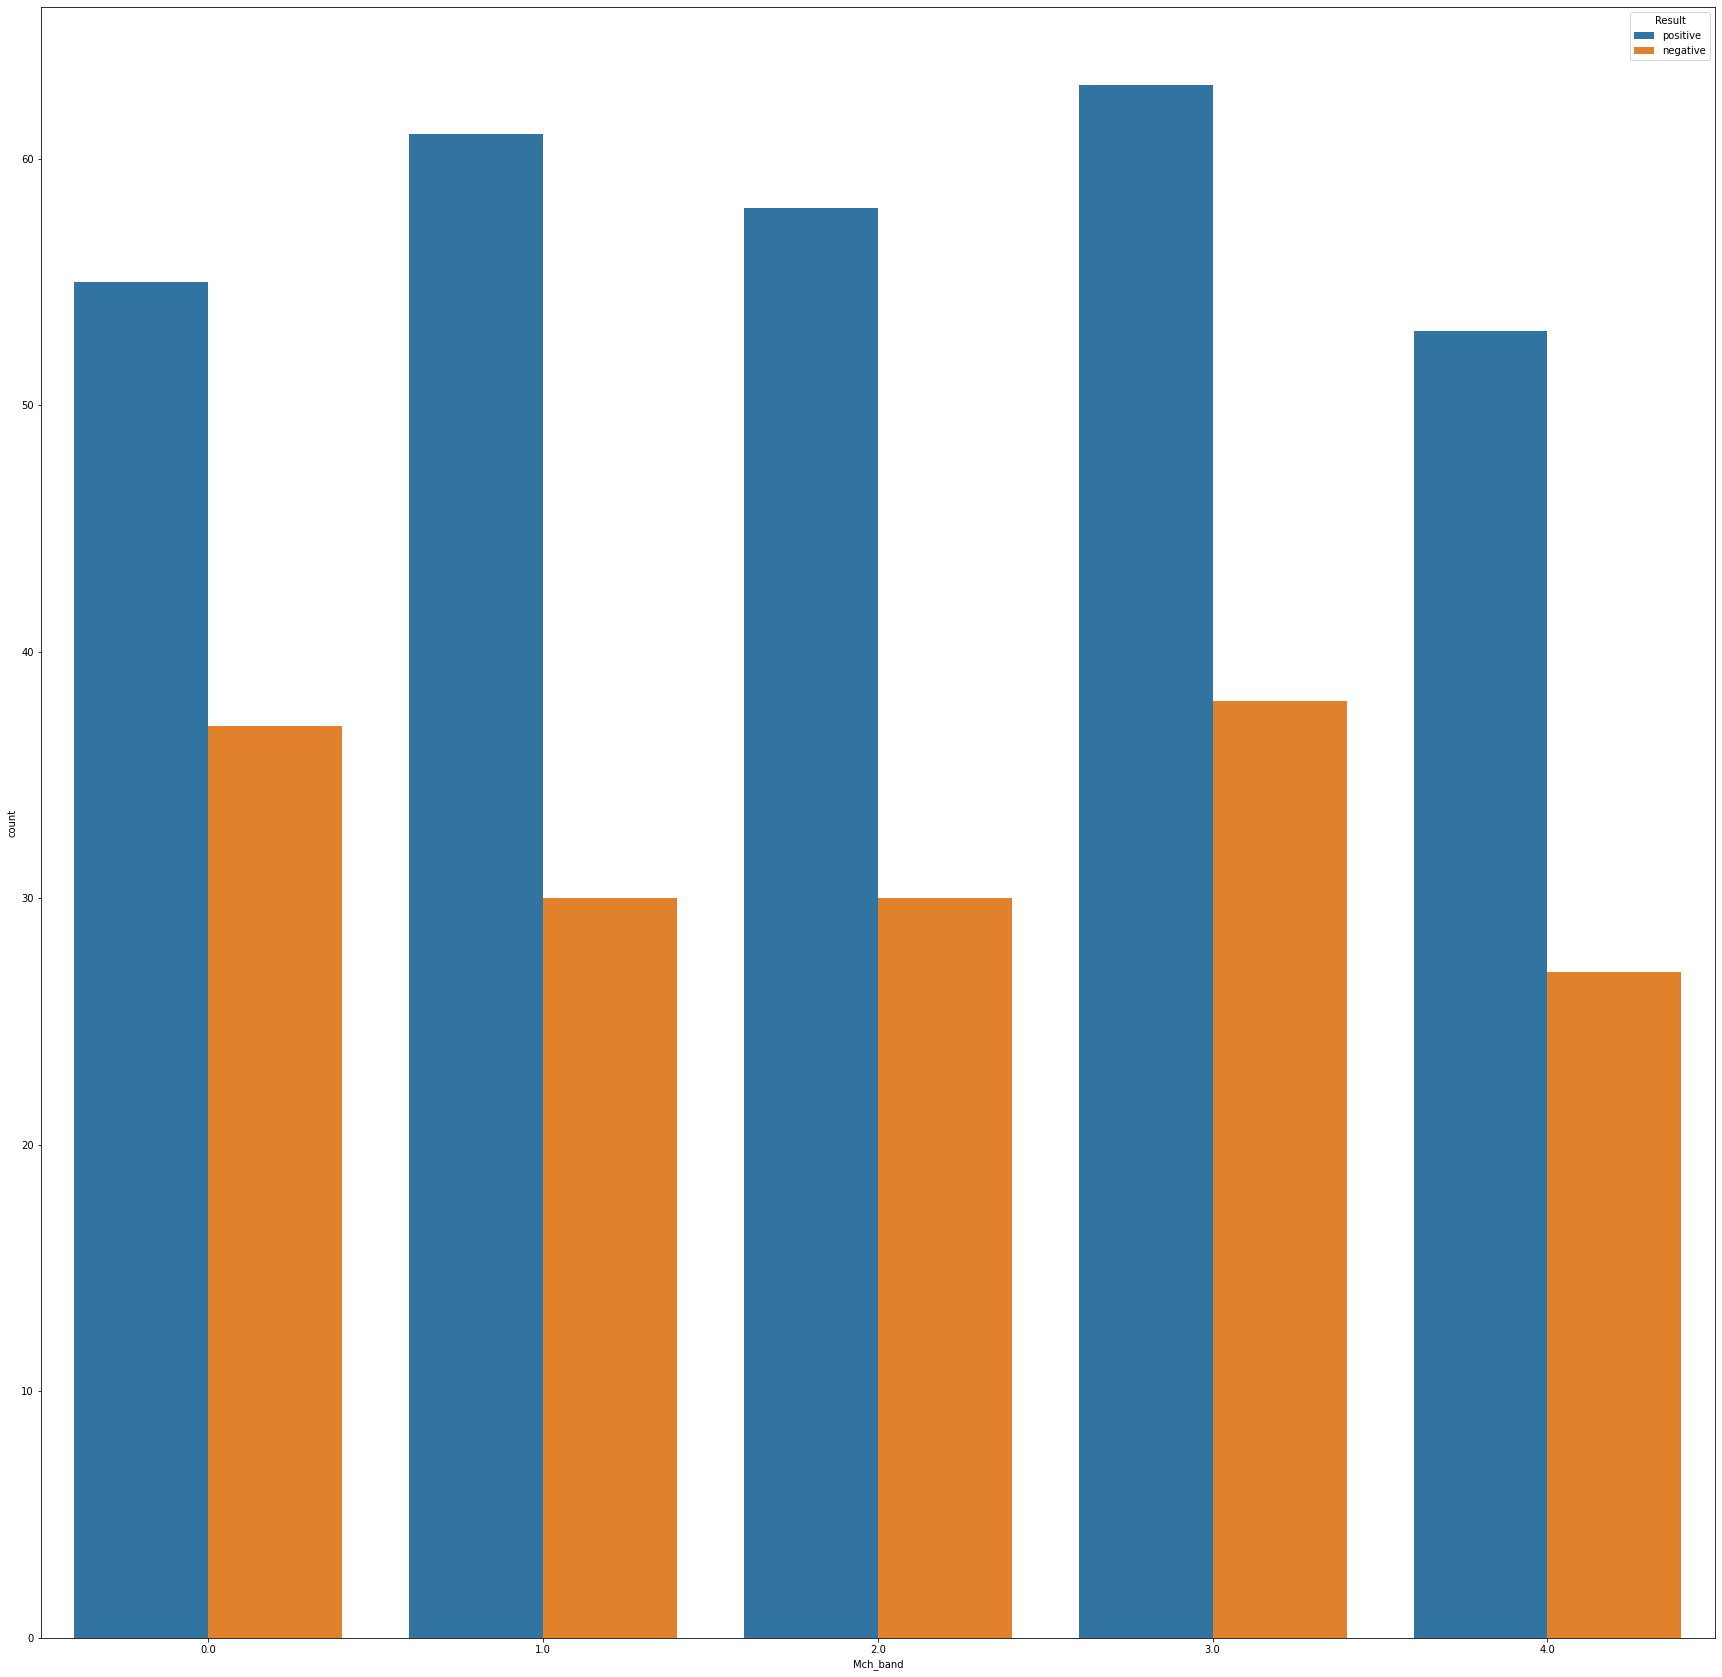

In [34]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['Mch_band'],hue='Result',data=df)
plt.show()

In [35]:
pd.crosstab([df['Mchc']],df['Result']).style.background_gradient(cmap='summer_r')

In [36]:
df["Mchc"] = pd.to_numeric(df["Mchc"])

In [37]:
_min = df['Mchc'].min()
_max = df['Mchc'].max()
print(f"Min Mchc is {_min} and maximum is {_max}")

Min Mchc is 28.6 and maximum is 37.5


In [38]:
#divide Hct into 5 bands and visualize
df['Mchc_band'] = pd.qcut(df['Mchc'], 5, labels = False)
pd.qcut(df['Mchc'], q=5)

1        (32.8, 33.4]
2                 NaN
3        (32.8, 33.4]
4        (32.2, 32.8]
5        (32.8, 33.4]
            ...      
465      (33.4, 37.5]
466      (32.2, 32.8]
467    (28.599, 31.7]
468    (28.599, 31.7]
469      (32.2, 32.8]
Name: Mchc, Length: 469, dtype: category
Categories (5, interval[float64]): [(28.599, 31.7] < (31.7, 32.2] < (32.2, 32.8] < (32.8, 33.4] < (33.4, 37.5]]

# Mchc vs Result

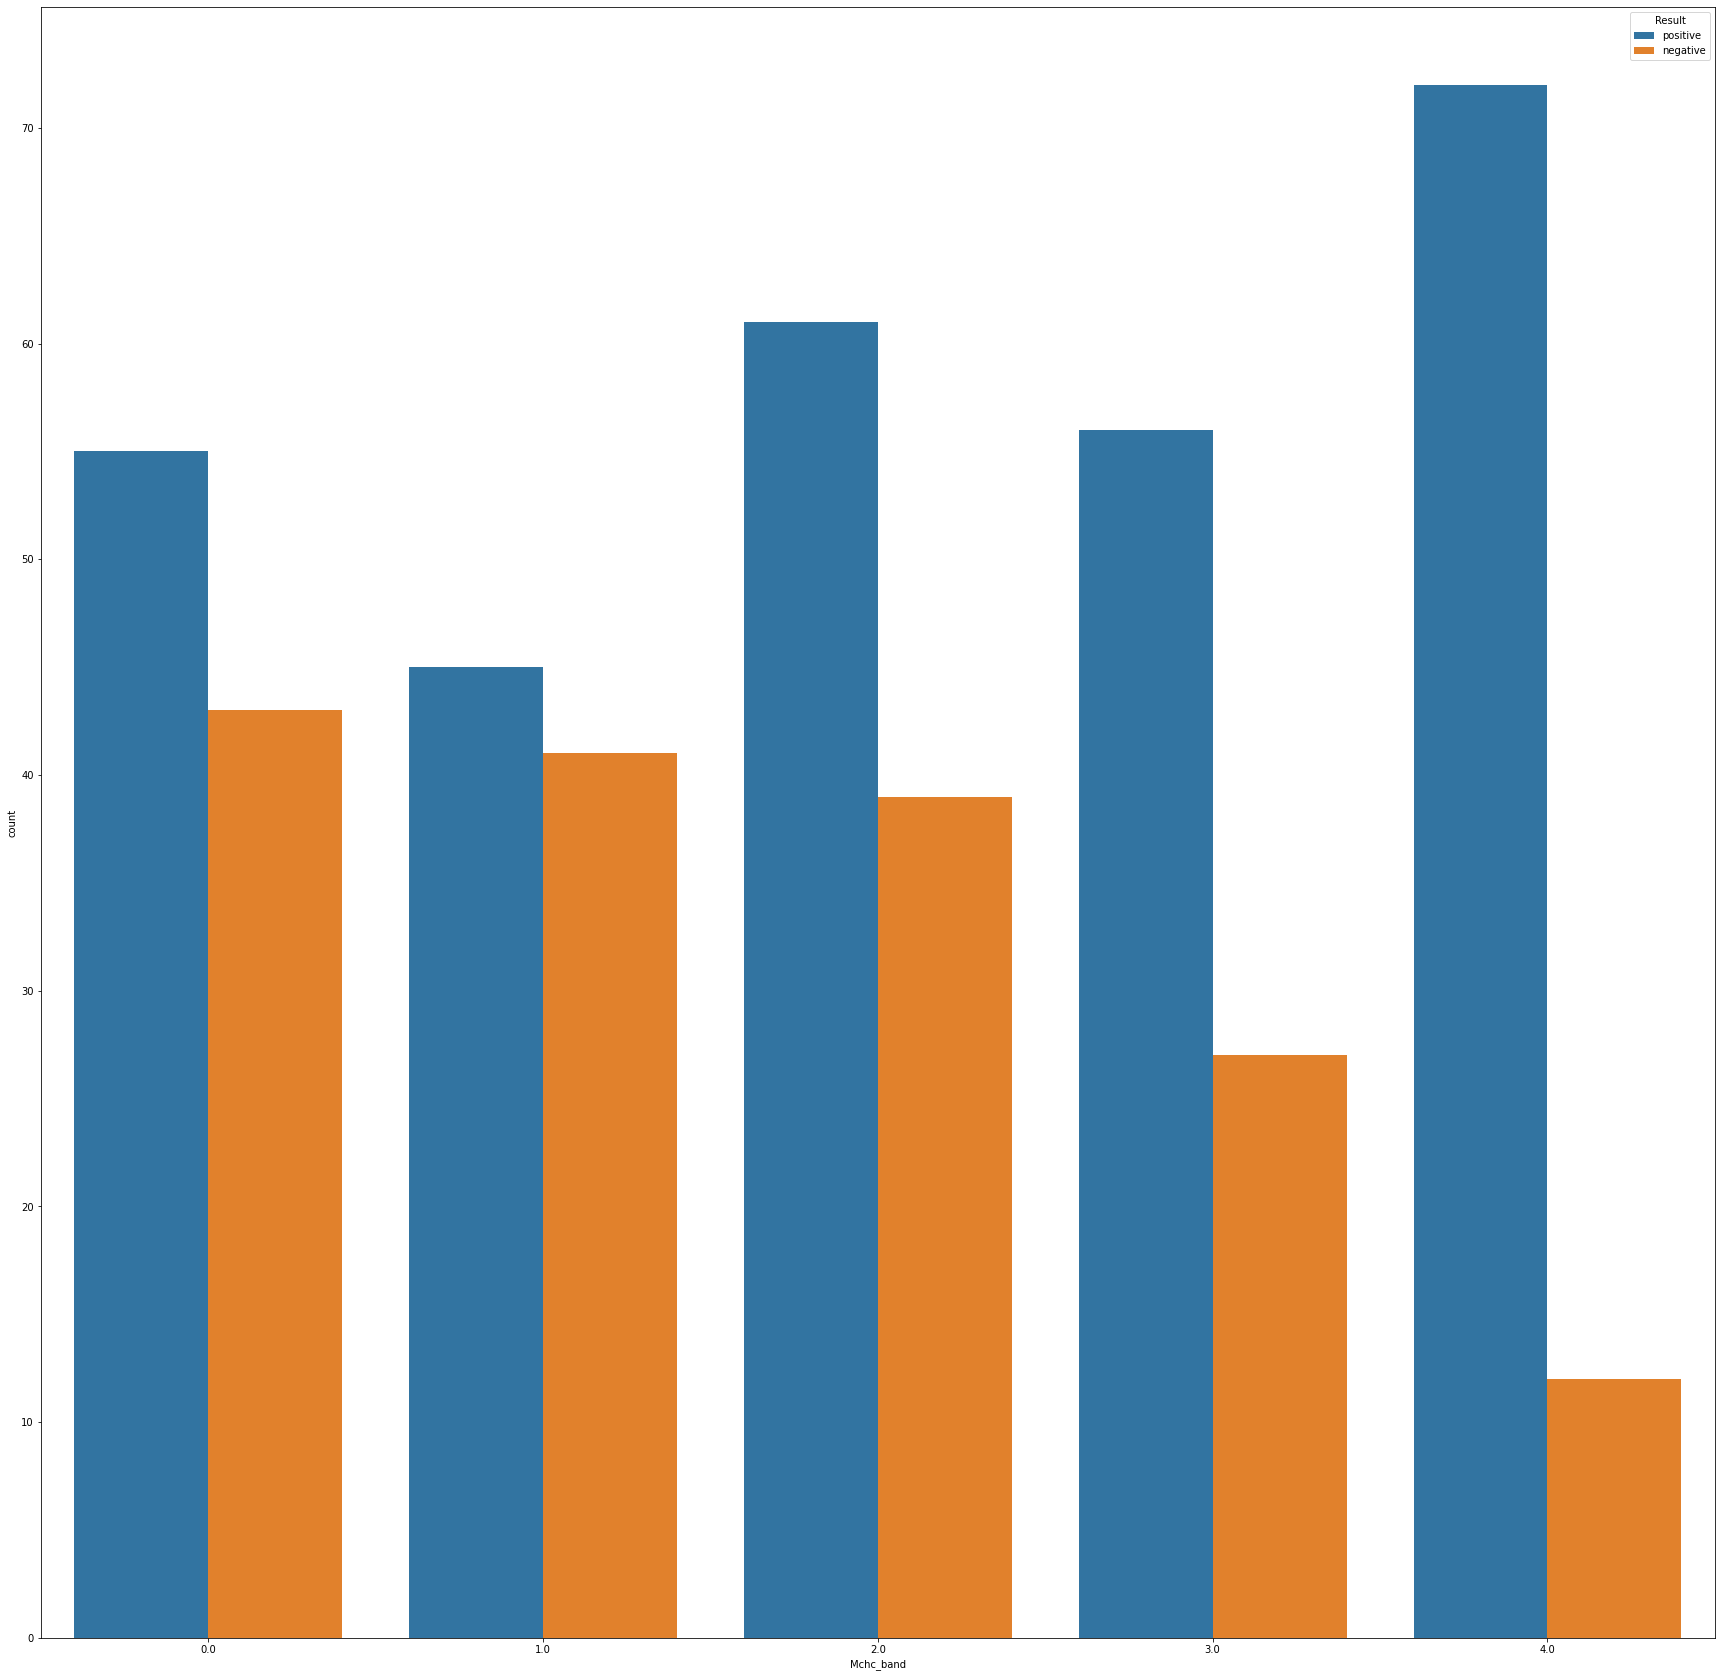

In [39]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['Mchc_band'],hue='Result',data=df)
plt.show()

In [40]:
pd.crosstab([df['Mcv']],df['Result']).style.background_gradient(cmap='summer_r')

In [41]:
df["Mcv"] = pd.to_numeric(df["Mcv"])

In [42]:
_min = df['Mcv'].min()
_max = df['Mcv'].max()
print(f"Min Mcv is {_min} and maximum is {_max}")

Min Mcv is 71.6 and maximum is 124.3


In [43]:
#divide Hct into 5 bands and visualize
df['Mcv_band'] = pd.qcut(df['Mcv'], 5, labels = False)
pd.qcut(df['Mcv'], q=5)

1                   (98.3, 102.5]
2                  (102.5, 124.3]
3      (71.59899999999999, 90.74]
4      (71.59899999999999, 90.74]
5                   (98.3, 102.5]
                  ...            
465                 (90.74, 94.7]
466                (102.5, 124.3]
467                  (94.7, 98.3]
468                 (90.74, 94.7]
469                (102.5, 124.3]
Name: Mcv, Length: 469, dtype: category
Categories (5, interval[float64]): [(71.59899999999999, 90.74] < (90.74, 94.7] < (94.7, 98.3] < (98.3, 102.5] < (102.5, 124.3]]

# Mcv vs Result

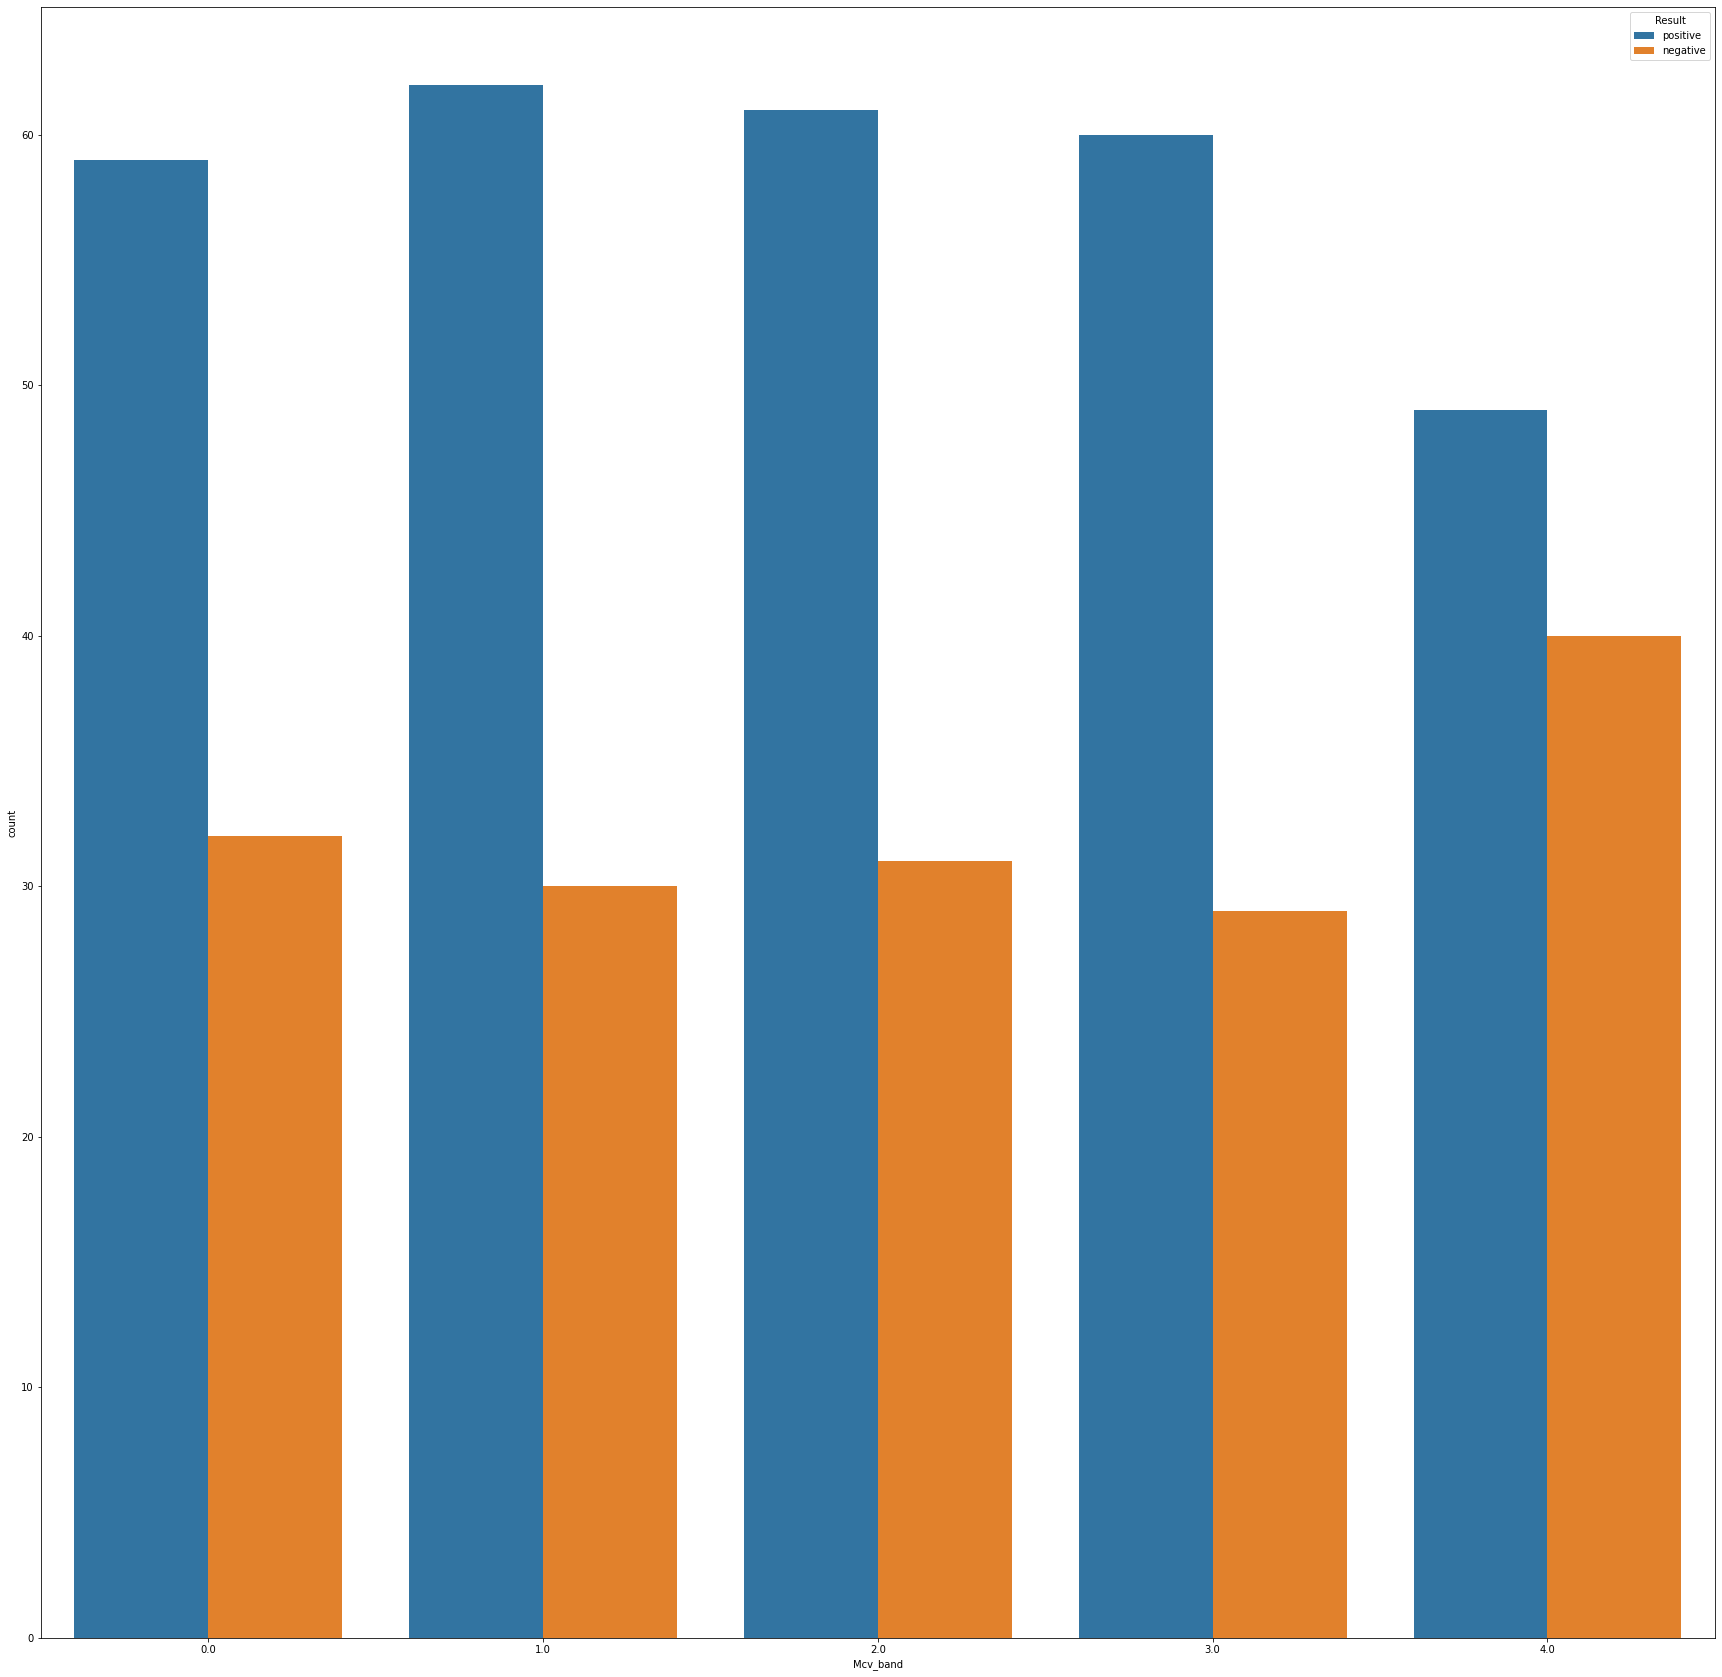

In [44]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['Mcv_band'],hue='Result',data=df)
plt.show()


In [45]:
pd.crosstab([df['Pdw']],df['Result']).style.background_gradient(cmap='summer_r')

In [46]:
df["Pdw"] = pd.to_numeric(df["Pdw"])

In [47]:
_min = df['Pdw'].min()
_max = df['Pdw'].max()
print(f"Min Pdw is {_min} and maximum is {_max}")

Min Pdw is 14.7 and maximum is 17.2


In [48]:
#divide Pdw into 5 bands and visualize
df['Pdw_band'] = pd.qcut(df['Pdw'], 5, labels = False)
pd.qcut(df['Pdw'], q=5)

1       (16.35, 17.2]
2                 NaN
3      (14.699, 15.7]
4        (15.7, 15.9]
5        (15.7, 15.9]
            ...      
465    (14.699, 15.7]
466     (16.1, 16.35]
467      (15.7, 15.9]
468     (16.35, 17.2]
469    (14.699, 15.7]
Name: Pdw, Length: 469, dtype: category
Categories (5, interval[float64]): [(14.699, 15.7] < (15.7, 15.9] < (15.9, 16.1] < (16.1, 16.35] < (16.35, 17.2]]

# Pdw vs Result

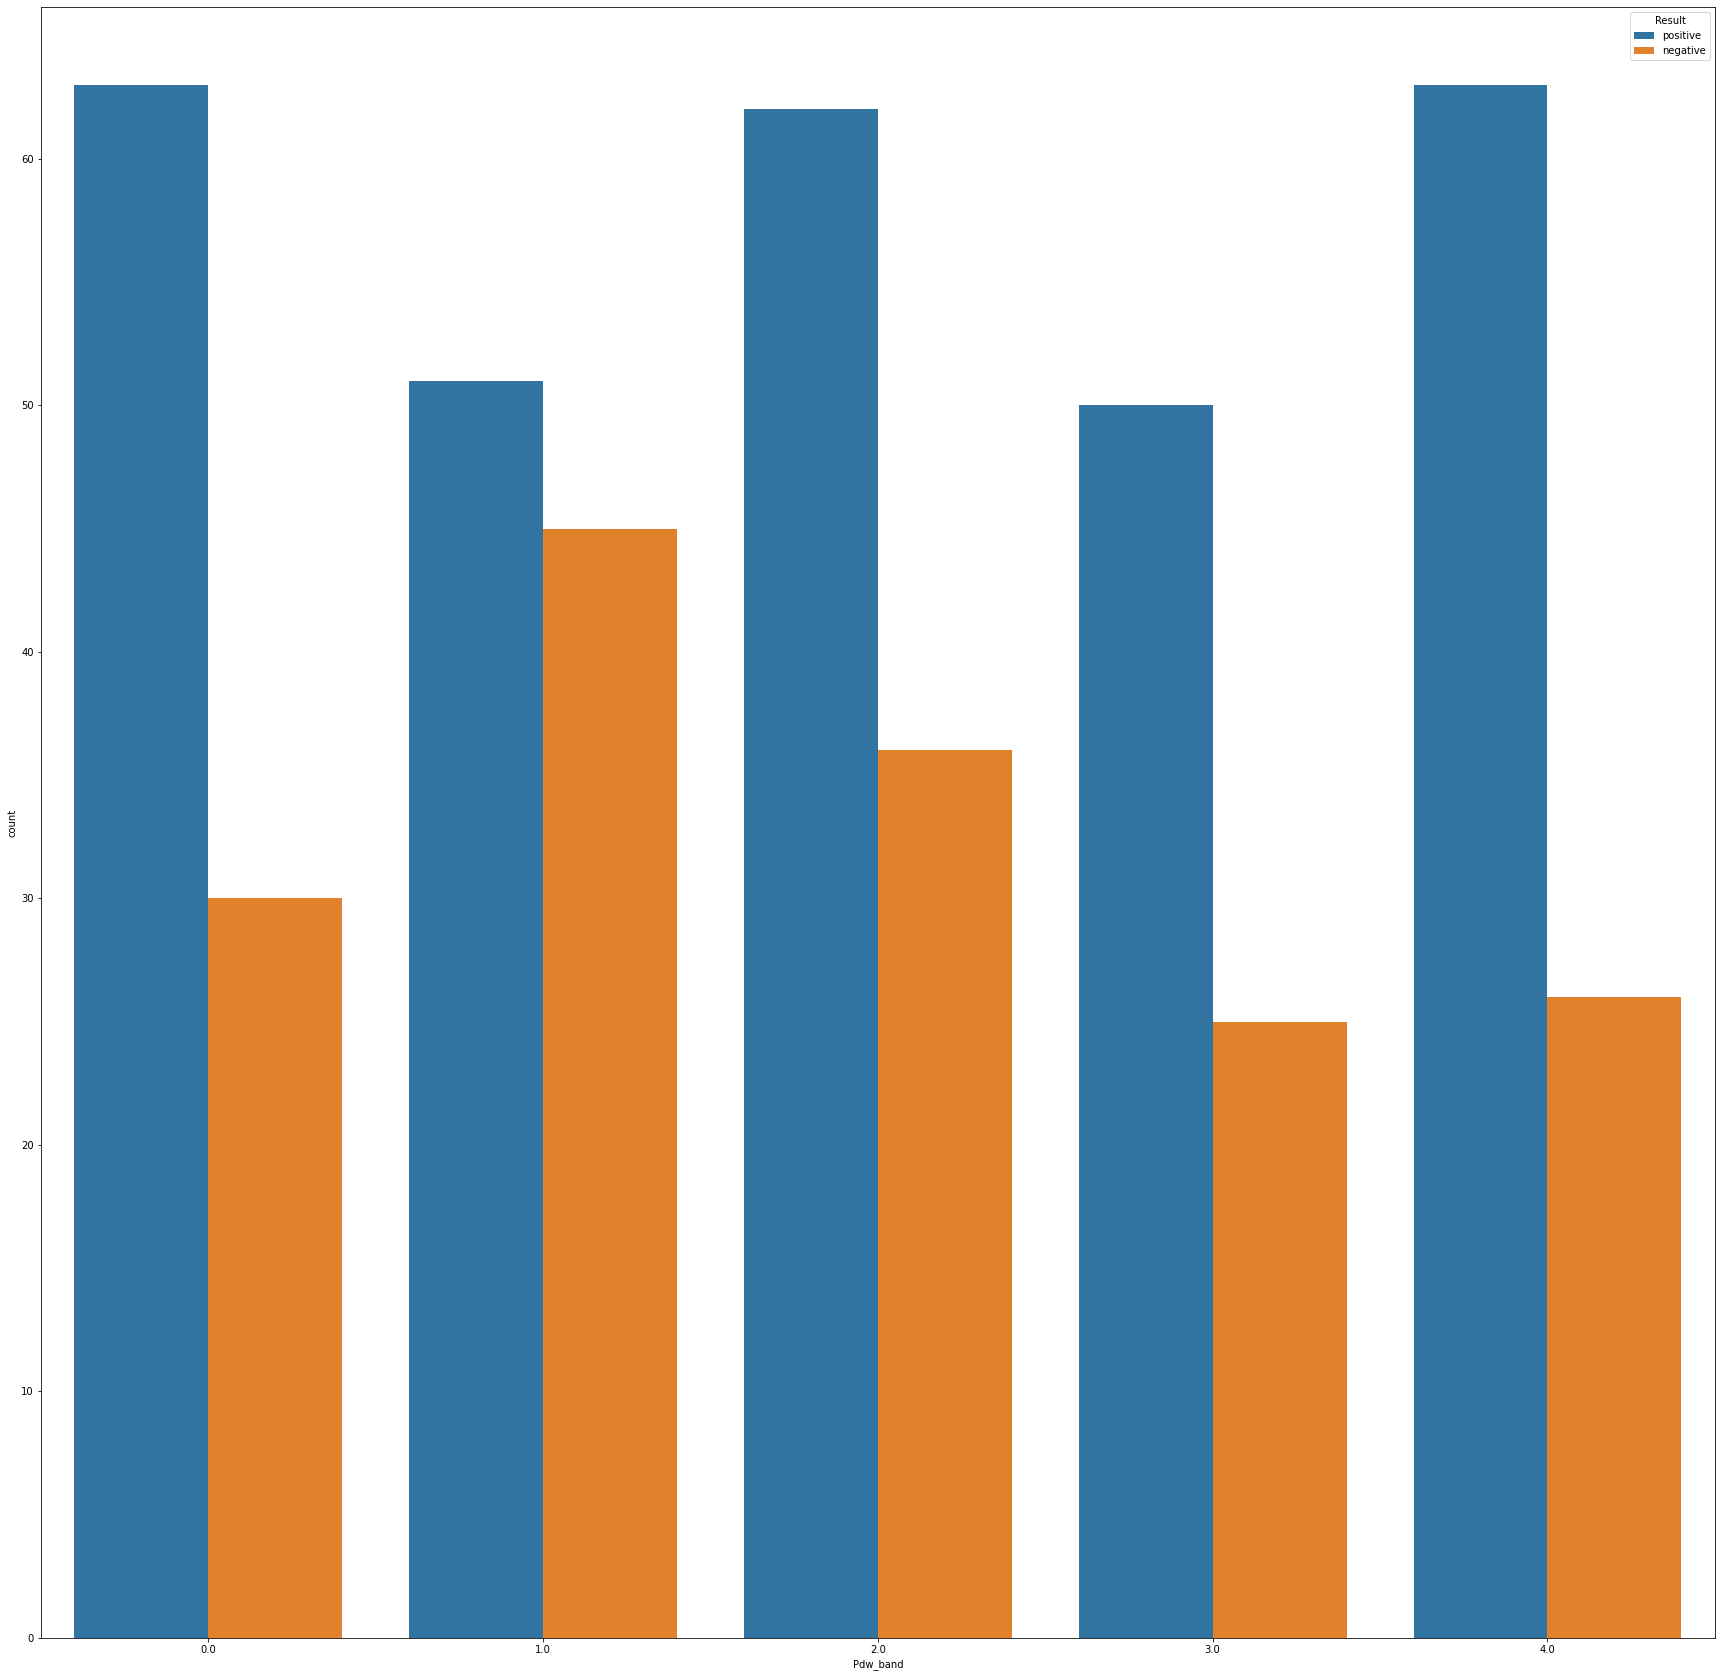

In [49]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['Pdw_band'],hue='Result',data=df)
plt.show()

In [50]:
pd.crosstab([df['Plt']],df['Result']).style.background_gradient(cmap='summer_r')

In [51]:
df["Plt"] = pd.to_numeric(df["Plt"])

In [52]:
_min = df['Plt'].min()
_max = df['Plt'].max()
print(f"Min Plt is {_min} and maximum is {_max}")

Min Plt is 18.25 and maximum is 833.0


In [53]:
#divide Plt into 5 bands and visualize
df['Plt_band'] = pd.qcut(df['Plt'], 5, labels = False)
pd.qcut(df['Plt'], q=5)

1      (18.249, 192.8]
2                  NaN
3      (312.44, 833.0]
4      (312.44, 833.0]
5       (192.8, 231.0]
            ...       
465    (267.4, 312.44]
466    (267.4, 312.44]
467    (267.4, 312.44]
468     (231.0, 267.4]
469    (267.4, 312.44]
Name: Plt, Length: 469, dtype: category
Categories (5, interval[float64]): [(18.249, 192.8] < (192.8, 231.0] < (231.0, 267.4] < (267.4, 312.44] < (312.44, 833.0]]

# Plt vs Result

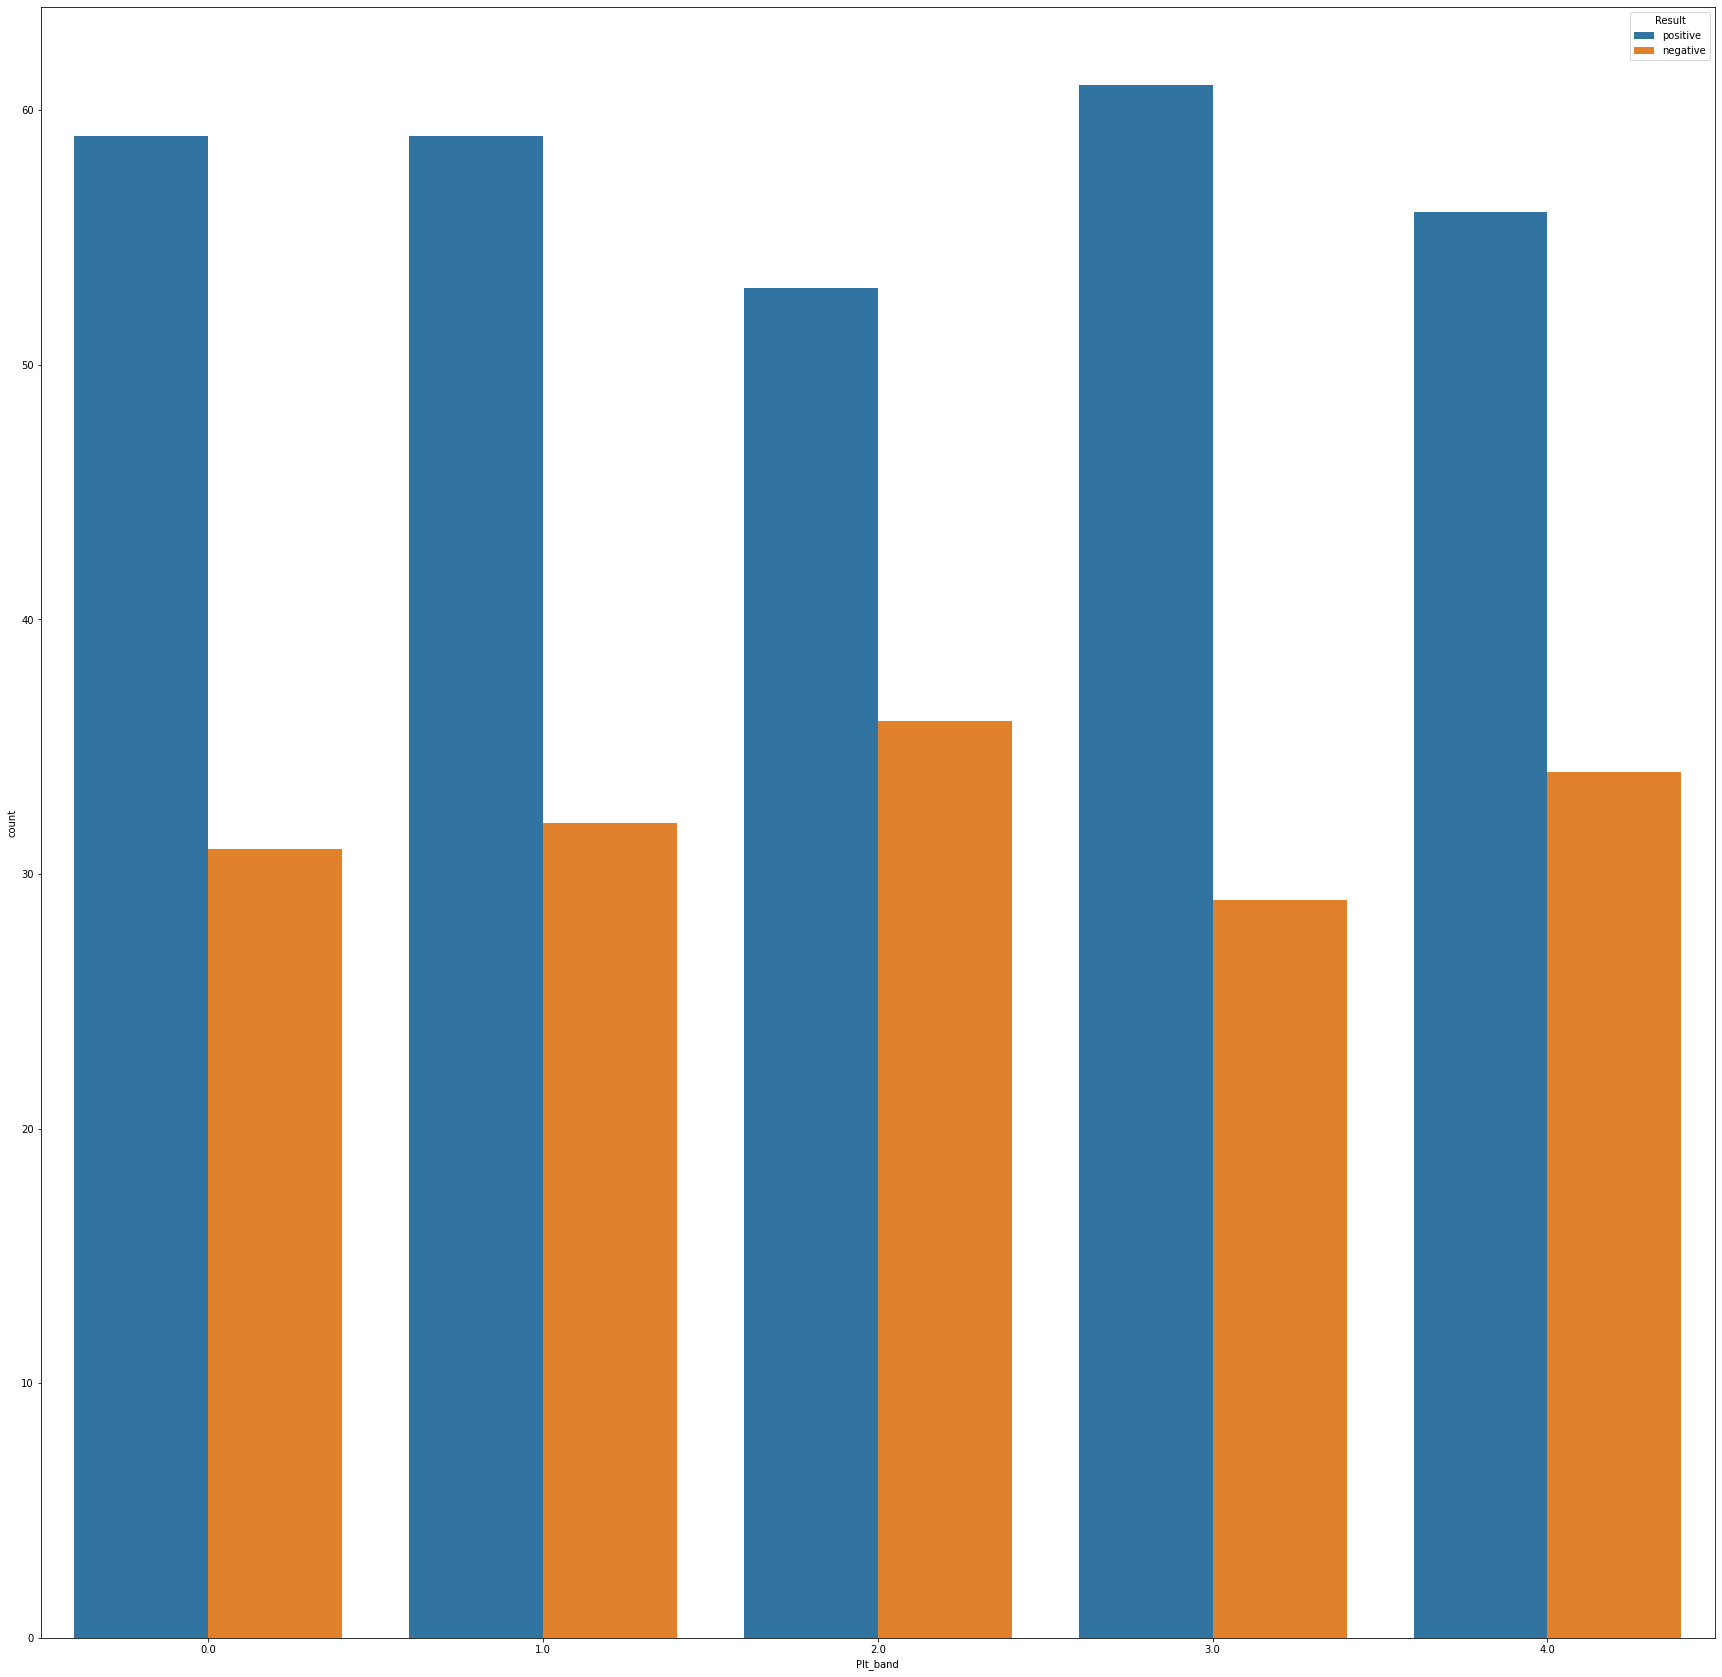

In [54]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['Plt_band'],hue='Result',data=df)
plt.show()

In [55]:
pd.crosstab([df['Rbc']],df['Result']).style.background_gradient(cmap='summer_r')

In [56]:
df["Rbc"] = pd.to_numeric(df["Rbc"])

In [57]:
_min = df['Rbc'].min()
_max = df['Rbc'].max()
print(f"Min Rbc is {_min} and maximum is {_max}")

Min Rbc is 2.04 and maximum is 8.01


In [58]:
#divide Rbc into 5 bands and visualize
df['Rbc_band'] = pd.qcut(df['Rbc'], 5, labels = False)
pd.qcut(df['Rbc'], q=5)

1      (4.548, 8.01]
2      (2.039, 3.68]
3      (2.039, 3.68]
4      (2.039, 3.68]
5      (4.28, 4.548]
           ...      
465    (4.548, 8.01]
466    (2.039, 3.68]
467      (3.68, 4.0]
468    (4.548, 8.01]
469      (3.68, 4.0]
Name: Rbc, Length: 469, dtype: category
Categories (5, interval[float64]): [(2.039, 3.68] < (3.68, 4.0] < (4.0, 4.28] < (4.28, 4.548] < (4.548, 8.01]]

# Rbc vs Result

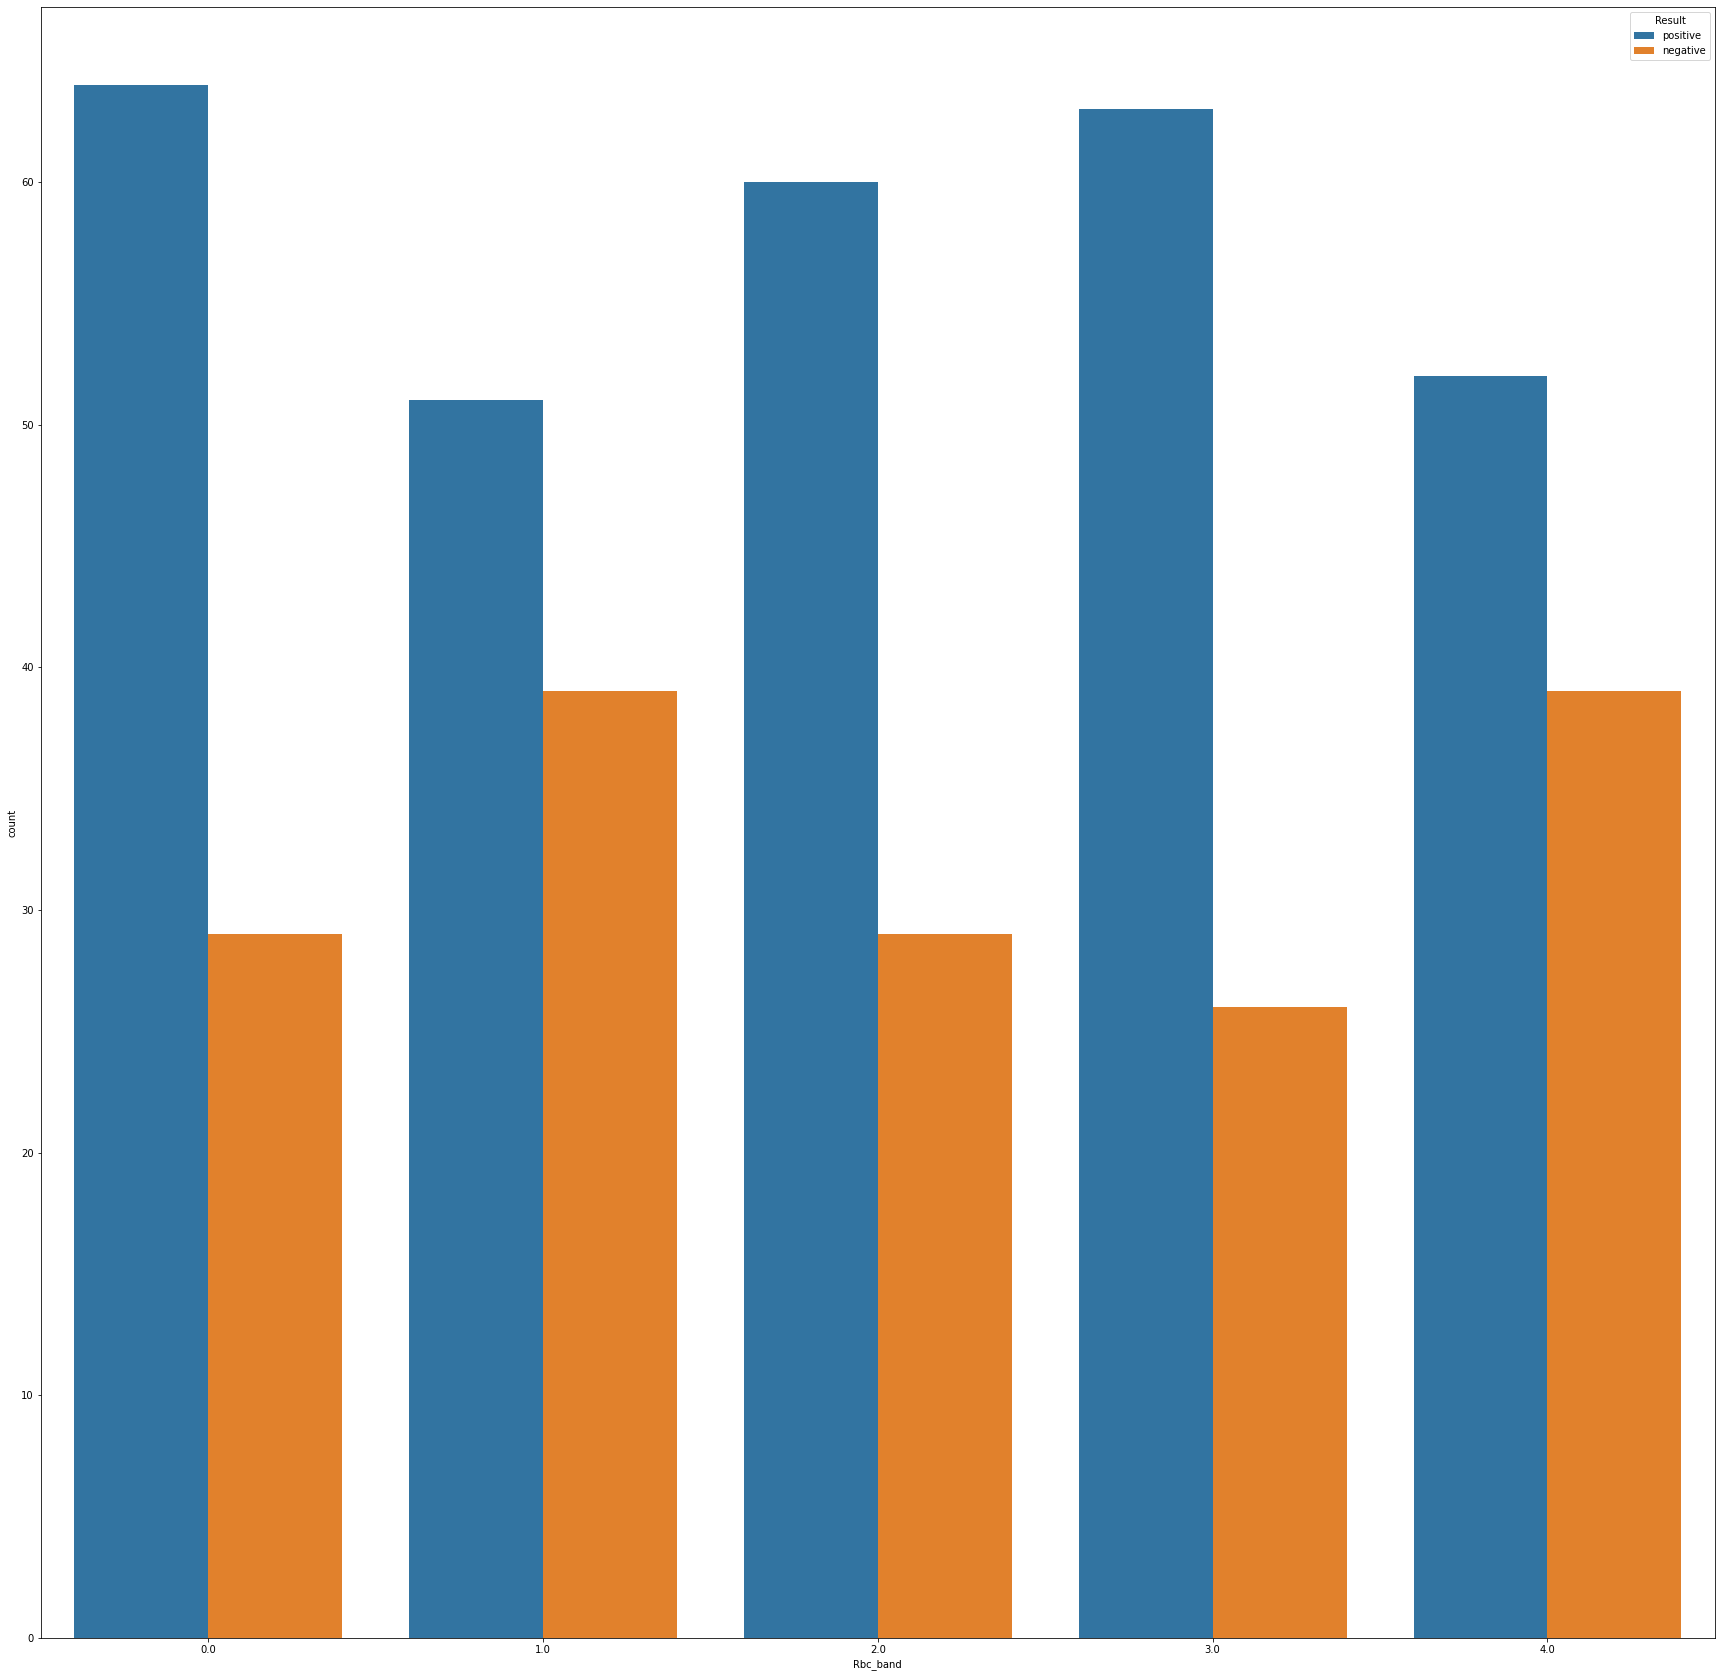

In [59]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['Rbc_band'],hue='Result',data=df)
plt.show()

In [60]:
pd.crosstab([df['Rdw-Cv']],df['Result']).style.background_gradient(cmap='summer_r')

In [61]:
df["Rdw-Cv"] = pd.to_numeric(df["Rdw-Cv"])

In [62]:
_min = df['Rdw-Cv'].min()
_max = df['Rdw-Cv'].max()
print(f"Min Rdw-Cv is {_min} and maximum is {_max}")

Min Rdw-Cv is 11.0 and maximum is 21.6


In [63]:
#divide Rdw-Cv into 5 bands and visualize
df['Rdw-Cv_band'] = pd.qcut(df['Rdw-Cv'], 5, labels = False)
pd.qcut(df['Rdw-Cv'], q=5)

1      (10.999, 12.3]
2                 NaN
3        (14.1, 21.6]
4        (14.1, 21.6]
5        (12.8, 13.3]
            ...      
465      (12.8, 13.3]
466    (10.999, 12.3]
467      (12.8, 13.3]
468      (13.3, 14.1]
469    (10.999, 12.3]
Name: Rdw-Cv, Length: 469, dtype: category
Categories (5, interval[float64]): [(10.999, 12.3] < (12.3, 12.8] < (12.8, 13.3] < (13.3, 14.1] < (14.1, 21.6]]

# Rdw-Cv vs Result

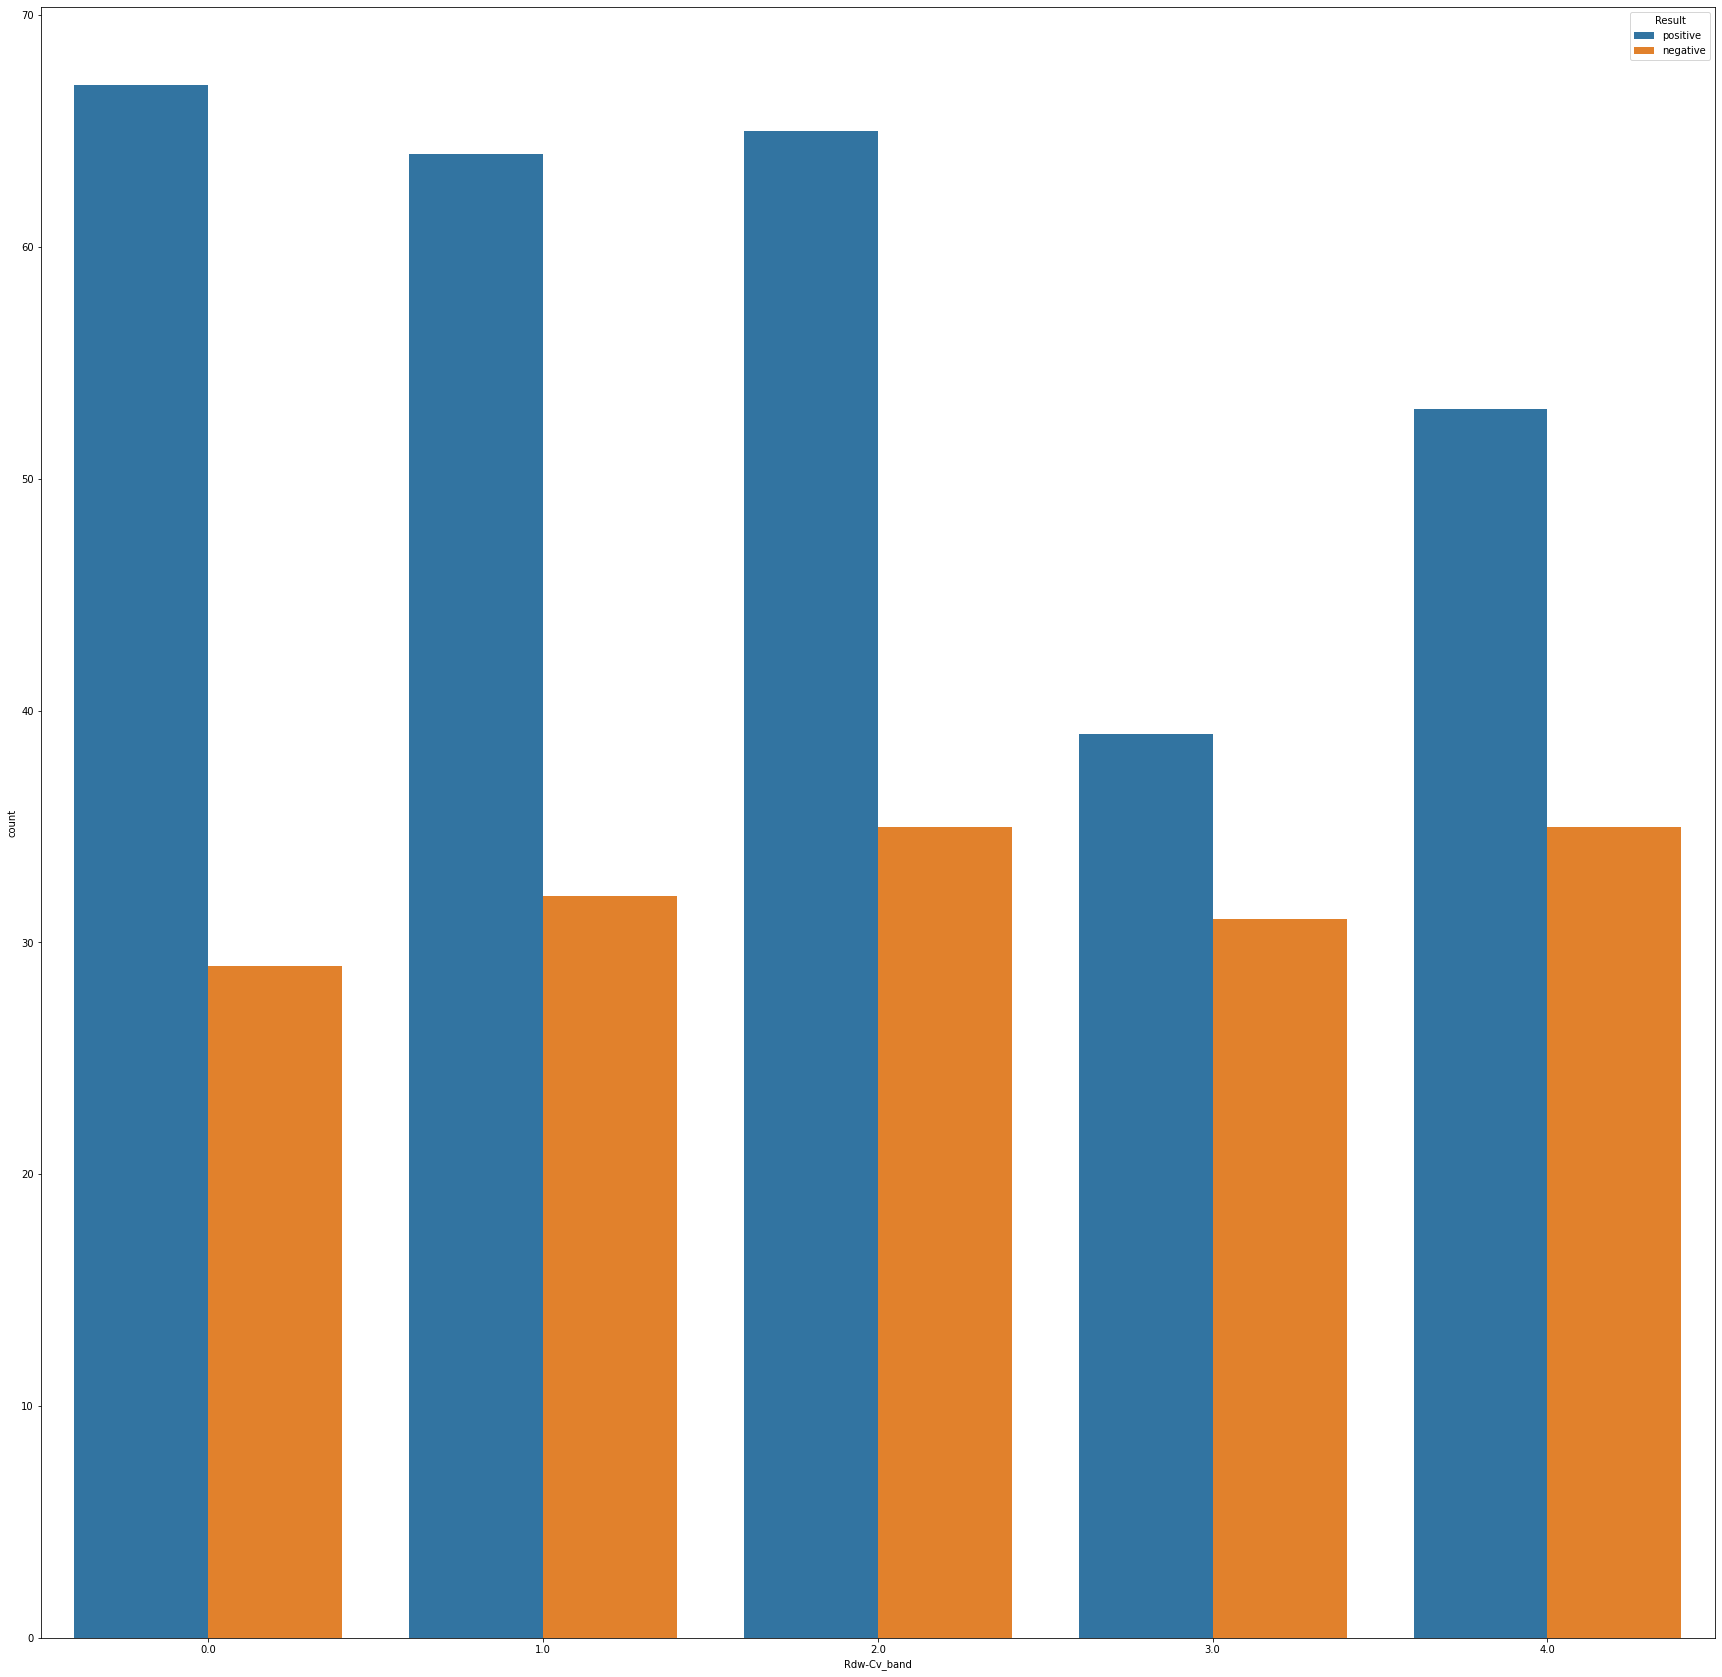

In [64]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['Rdw-Cv_band'],hue='Result',data=df)
plt.show()

In [65]:
pd.crosstab([df['Rdw-Sd']],df['Result']).style.background_gradient(cmap='summer_r')

In [66]:
df["Rdw-Sd"] = pd.to_numeric(df["Rdw-Sd"])

In [67]:
_min = df['Rdw-Sd'].min()
_max = df['Rdw-Sd'].max()
print(f"Min Rdw-Sd is {_min} and maximum is {_max}")

Min Rdw-Sd is 37.1 and maximum is 87.0


In [68]:
#divide Rdw-Sd into 5 bands and visualize
df['Rdw-Sd_band'] = pd.qcut(df['Rdw-Sd'], 5, labels = False)
pd.qcut(df['Rdw-Sd'], q=5)

1      (44.4, 46.2]
2               NaN
3      (50.1, 87.0]
4      (50.1, 87.0]
5      (48.3, 50.1]
           ...     
465    (46.2, 48.3]
466    (44.4, 46.2]
467    (46.2, 48.3]
468    (46.2, 48.3]
469    (44.4, 46.2]
Name: Rdw-Sd, Length: 469, dtype: category
Categories (5, interval[float64]): [(37.099000000000004, 44.4] < (44.4, 46.2] < (46.2, 48.3] < (48.3, 50.1] < (50.1, 87.0]]

# Rdw-Sd vs Result

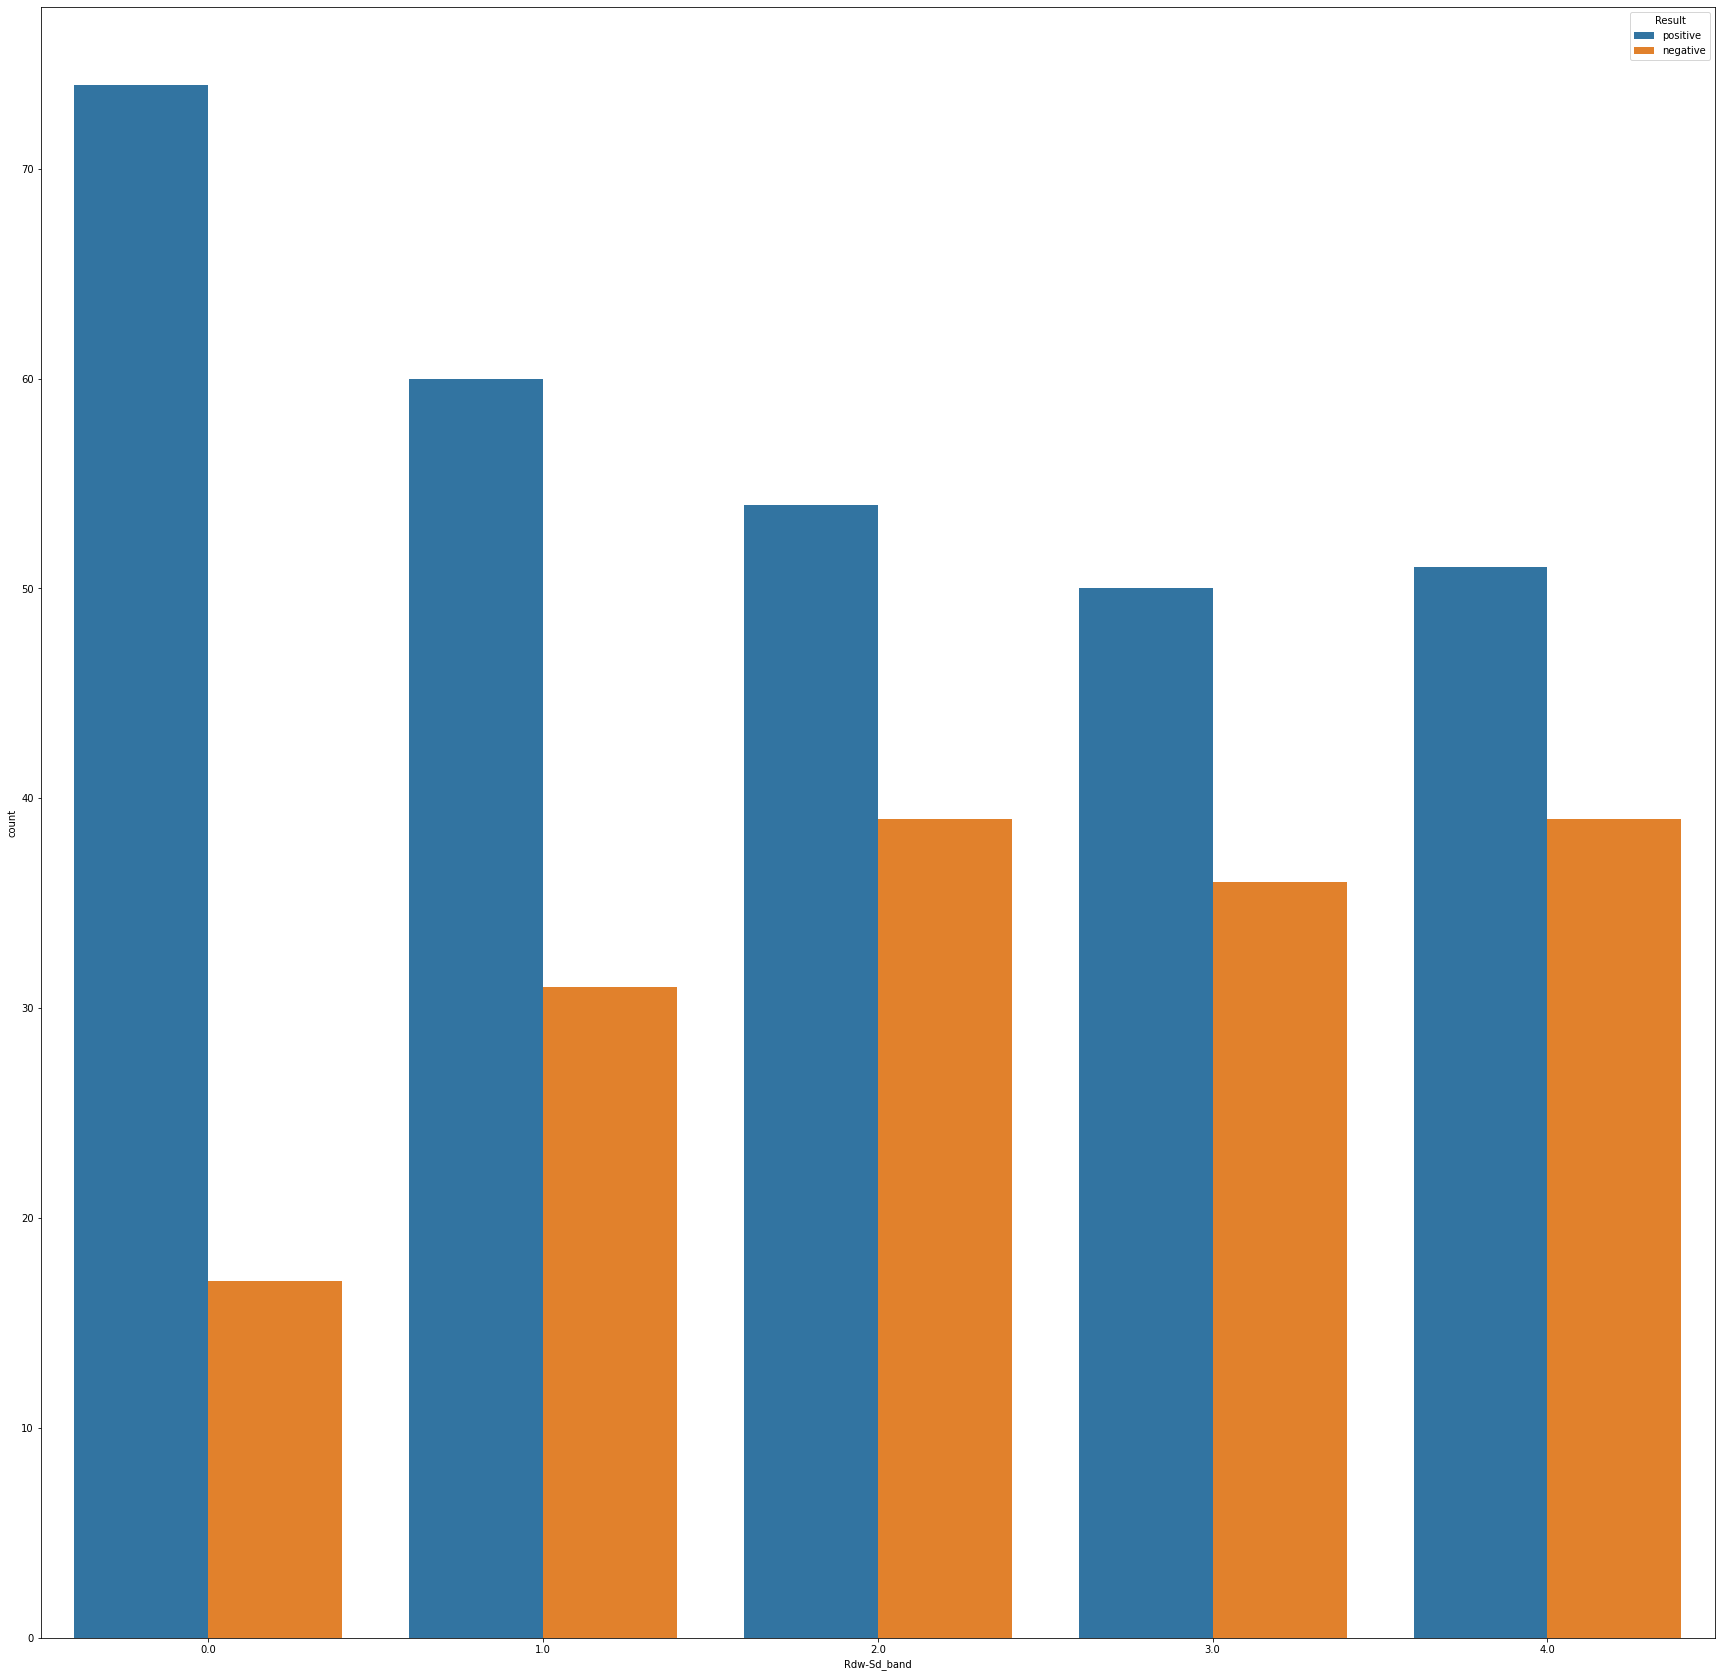

In [69]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['Rdw-Sd_band'],hue='Result',data=df)
plt.show()

In [70]:
pd.crosstab([df['Wbc']],df['Result']).style.background_gradient(cmap='summer_r')

In [71]:
df["Wbc"] = pd.to_numeric(df["Wbc"])

In [72]:
_min = df['Wbc'].min()
_max = df['Wbc'].max()
print(f"Min Wbc is {_min} and maximum is {_max}")

Min Wbc is 2.79 and maximum is 43.1


In [73]:
#divide Wbc into 5 bands and visualize
df['Wbc_band'] = pd.qcut(df['Wbc'], 5, labels = False)
pd.qcut(df['Wbc'], q=5)

1       (4.76, 5.6]
2               NaN
3      (7.93, 43.1]
4      (7.93, 43.1]
5       (5.6, 6.42]
           ...     
465     (4.76, 5.6]
466     (4.76, 5.6]
467     (5.6, 6.42]
468    (6.42, 7.93]
469     (4.76, 5.6]
Name: Wbc, Length: 469, dtype: category
Categories (5, interval[float64]): [(2.789, 4.76] < (4.76, 5.6] < (5.6, 6.42] < (6.42, 7.93] < (7.93, 43.1]]

# Wbc vs Result

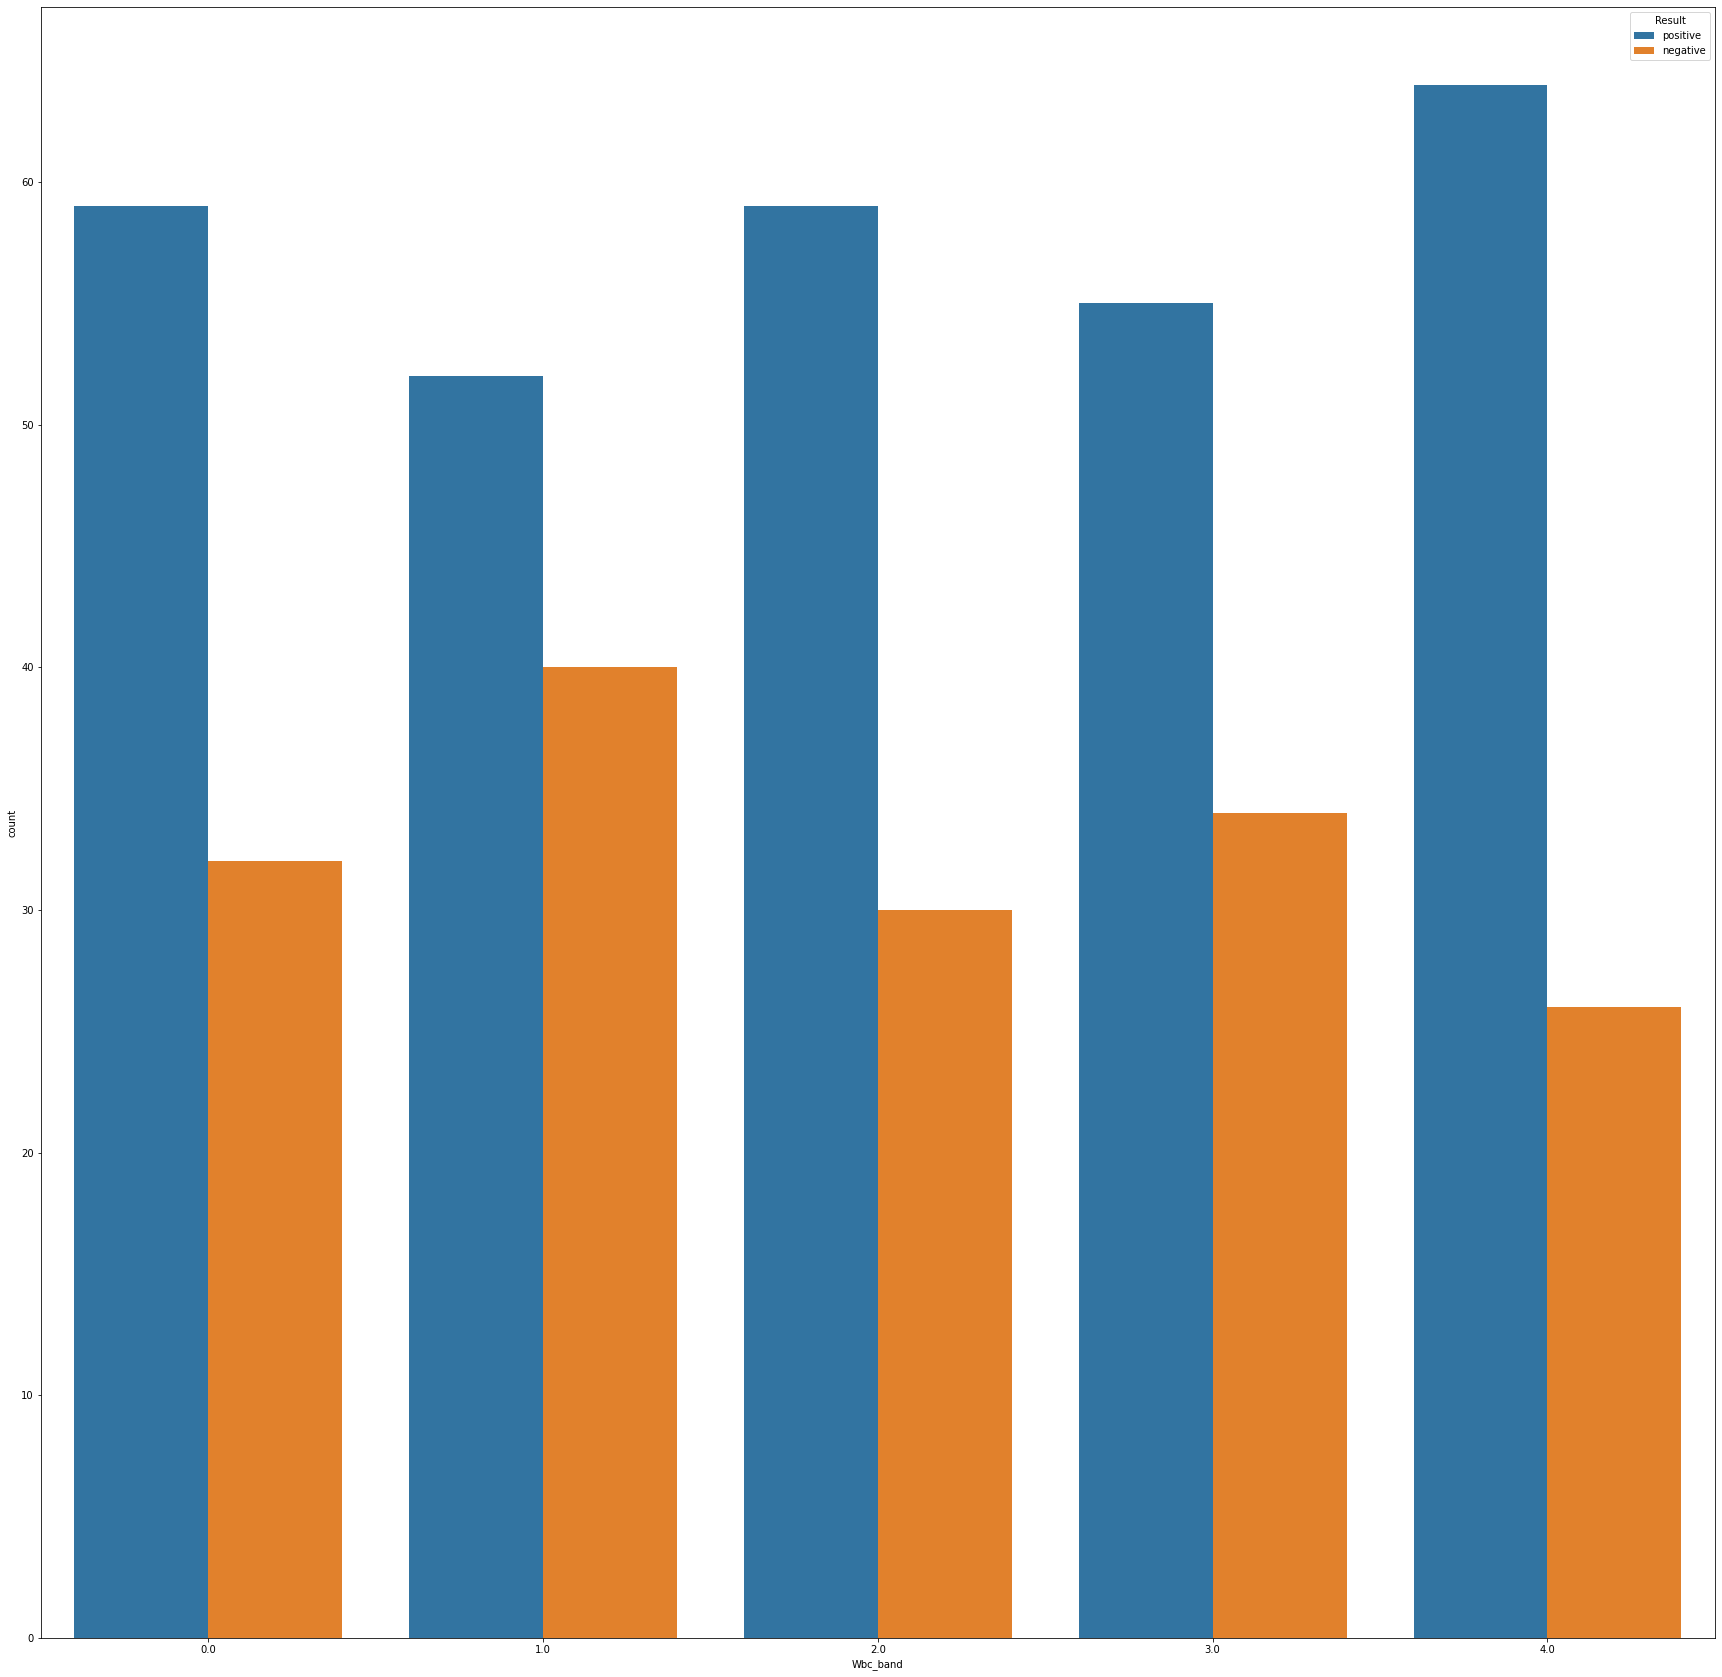

In [74]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['Wbc_band'],hue='Result',data=df)
plt.show()

# One Hot Encoding of Results Feature

In [75]:
from sklearn.preprocessing import LabelBinarizer

In [76]:
lb = LabelBinarizer()
df['Result'] = lb.fit_transform(df['Result'])

# Correlation Matrix

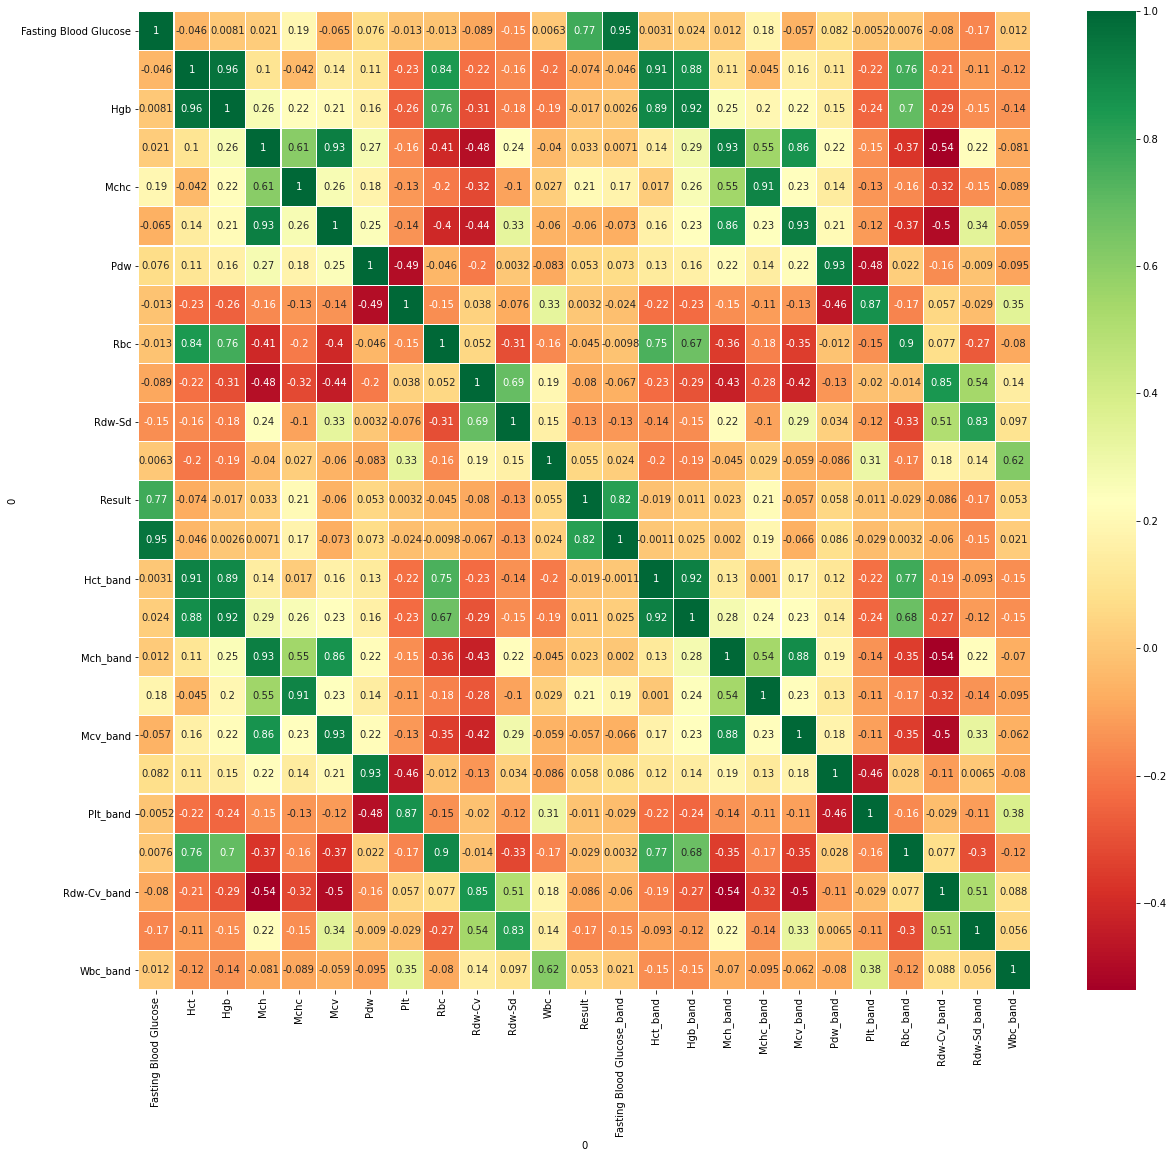

In [77]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,18)
plt.show() 

# PAIR PLOT

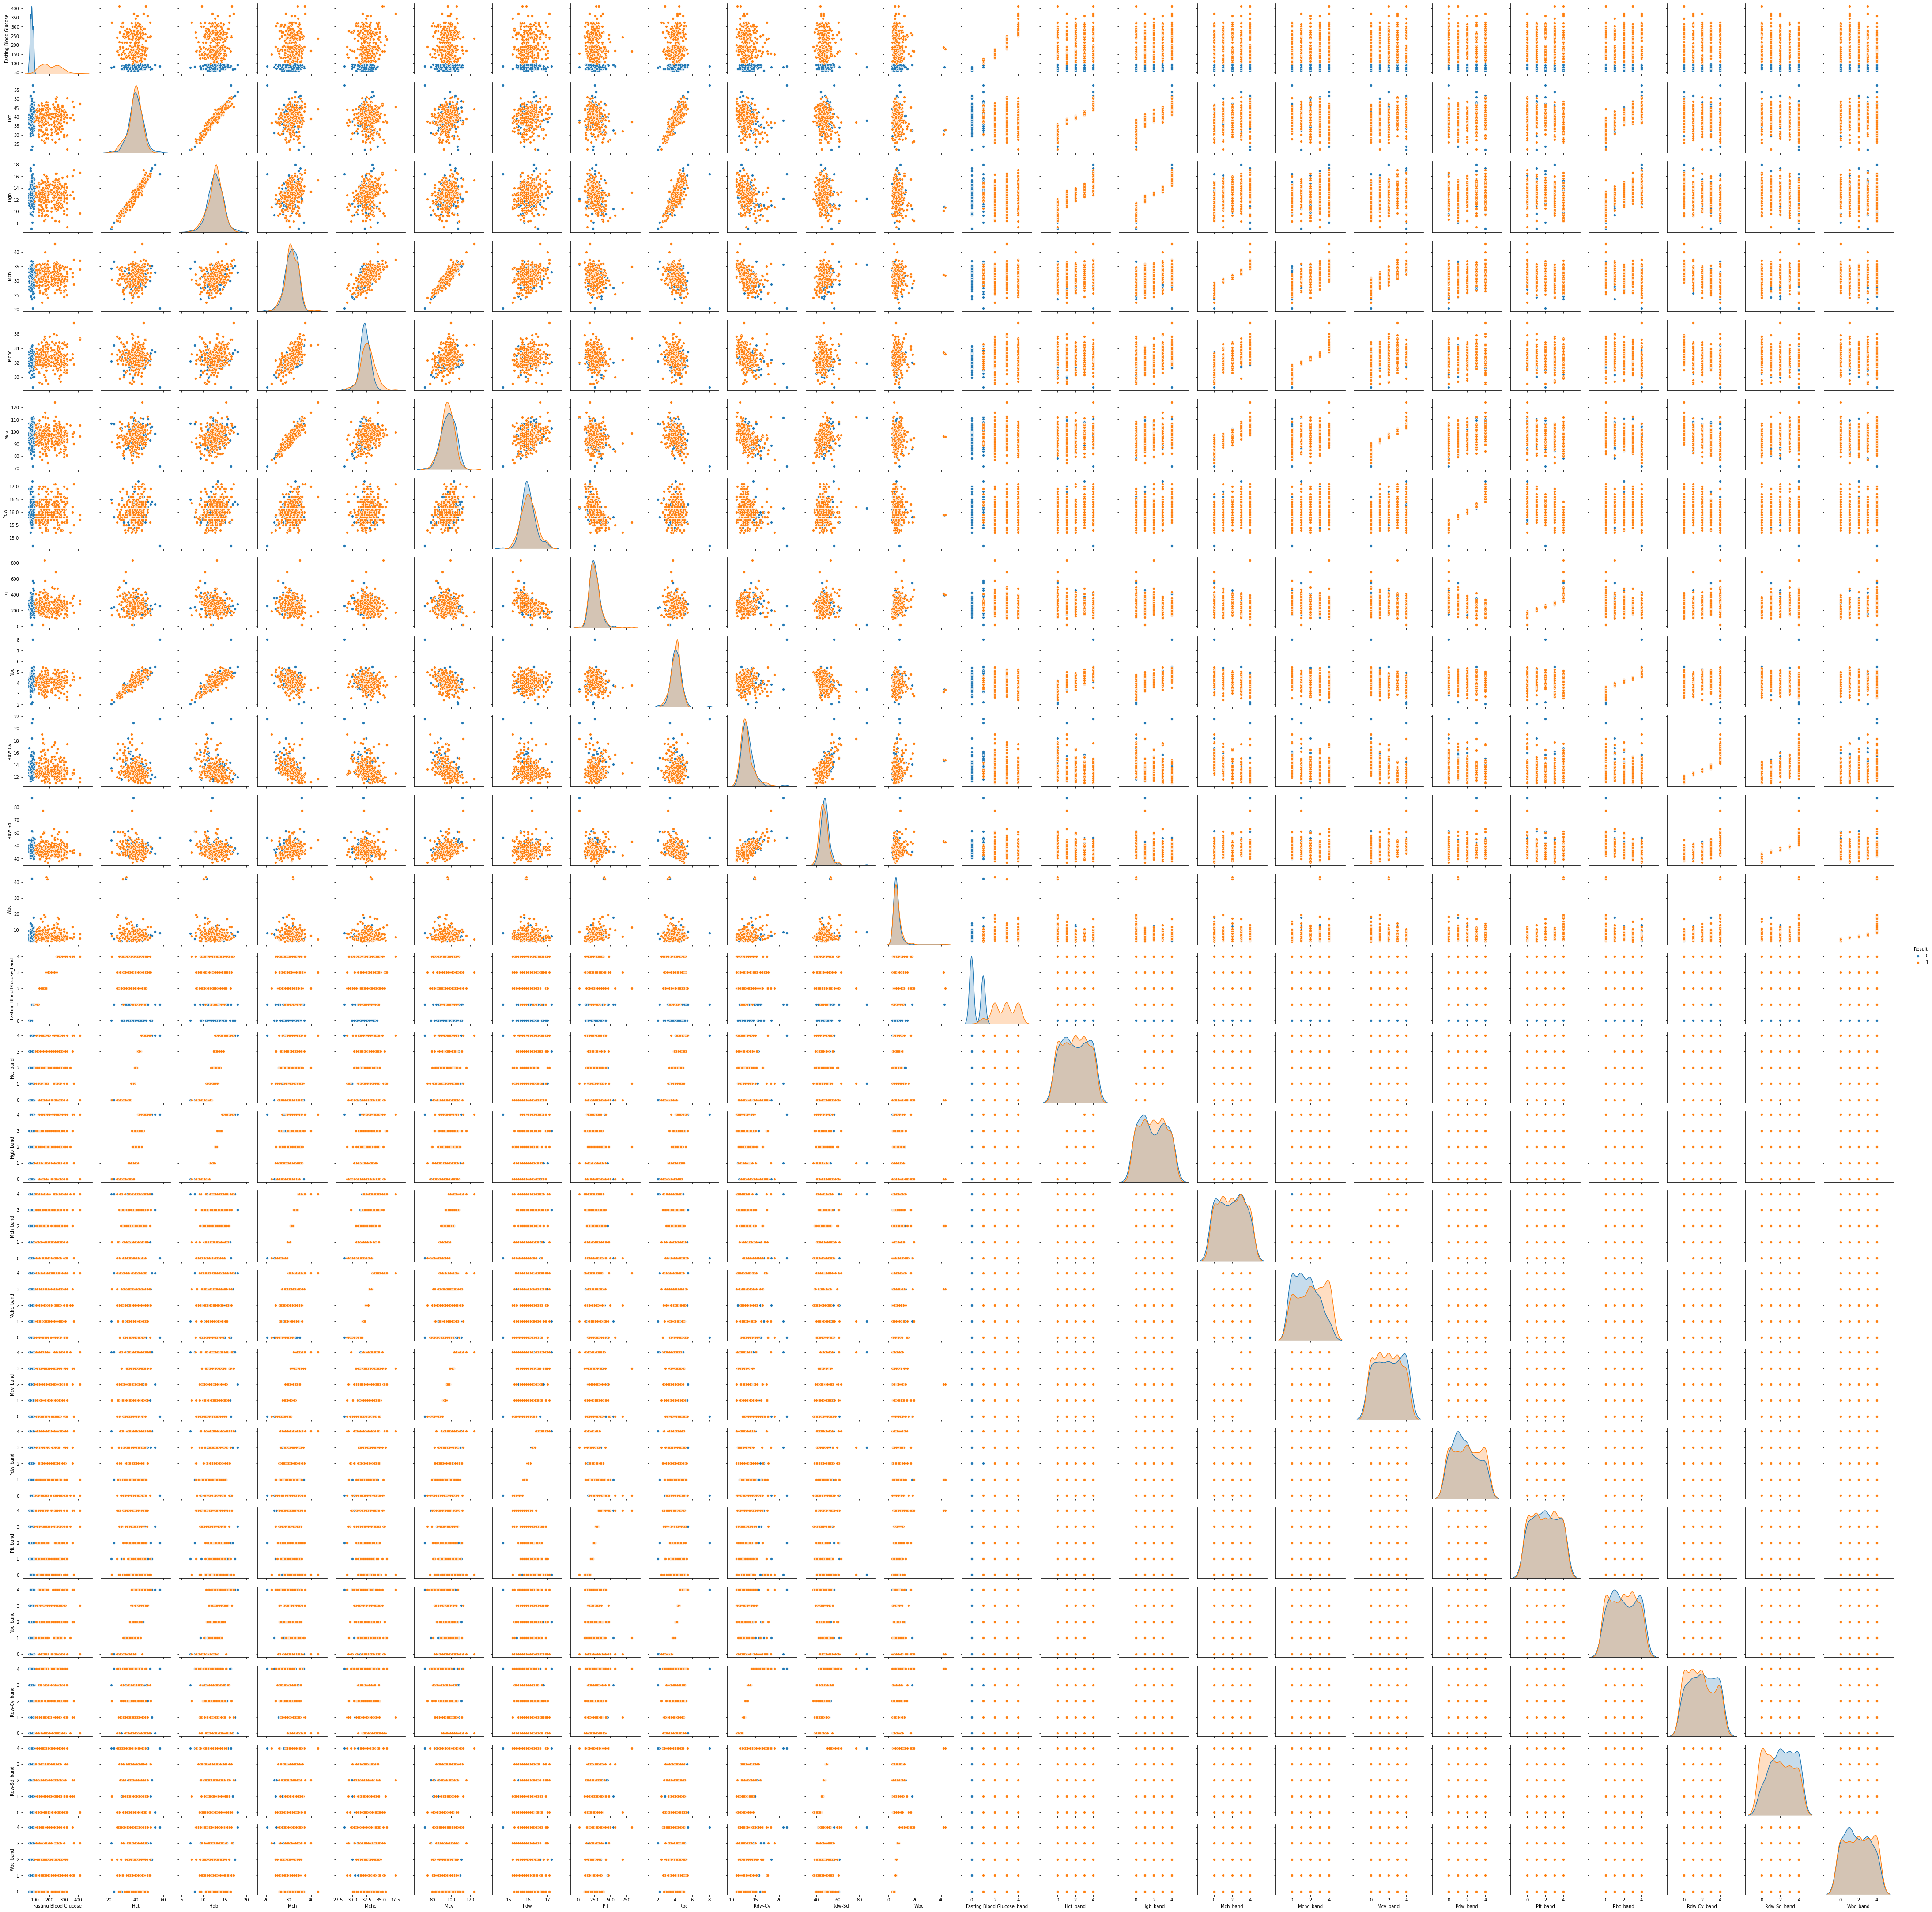

In [78]:
sns.pairplot(df, hue="Result")
plt.show()

# Create Two Sets of Dataset one with Fasting_Blood_Glucose and the other with the feature dropped

In [134]:
df = df.fillna(df.mean())

In [135]:
df.columns

Index(['Name', 'Fasting Blood Glucose', 'Hct', 'Hgb', 'Mch', 'Mchc', 'Mcv',
       'Pdw', 'Plt', 'Rbc', 'Rdw-Cv', 'Rdw-Sd', 'Wbc', 'Result',
       'Fasting Blood Glucose_band', 'Hct_band', 'Hgb_band', 'Mch_band',
       'Mchc_band', 'Mcv_band', 'Pdw_band', 'Plt_band', 'Rbc_band',
       'Rdw-Cv_band', 'Rdw-Sd_band', 'Wbc_band'],
      dtype='object', name=0)

In [136]:
df_1 = df[['Fasting Blood Glucose', 'Hct', 'Hgb', 'Mch', 'Mchc', 'Mcv',
       'Pdw', 'Plt', 'Rbc', 'Rdw-Cv', 'Rdw-Sd', 'Wbc']]

In [137]:
df_2 = df[['Hct', 'Hgb', 'Mch', 'Mchc', 'Mcv',
       'Pdw', 'Plt', 'Rbc', 'Rdw-Cv', 'Rdw-Sd', 'Wbc']]

In [138]:
df_1.count()

0
Fasting Blood Glucose    469
Hct                      469
Hgb                      469
Mch                      469
Mchc                     469
Mcv                      469
Pdw                      469
Plt                      469
Rbc                      469
Rdw-Cv                   469
Rdw-Sd                   469
Wbc                      469
dtype: int64

# Split Dataset into Test and Train

In [139]:
#data with fasting blood glucose
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(df_1, df['Result'], test_size=0.3) # 70% training and 30% test

In [140]:
#data without fasting blood glucose
X2_train, X2_test, y2_train, y2_test = train_test_split(df_2, df['Result'], test_size=0.3) # 70% training and 30% test

# TRAIN WITH RANDOM FOREST

In [141]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=20)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X1_train,y1_train)

y1_predA=clf.predict(X1_test)

In [142]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_test, y1_predA))
print("f1 score:",f1_score(y1_test, y1_predA, zero_division=1))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y1_test, y1_predA, average='macro'))


Accuracy: 1.0
f1 score: 1.0
precision, recall, F-measure and support: (1.0, 1.0, 1.0, None)


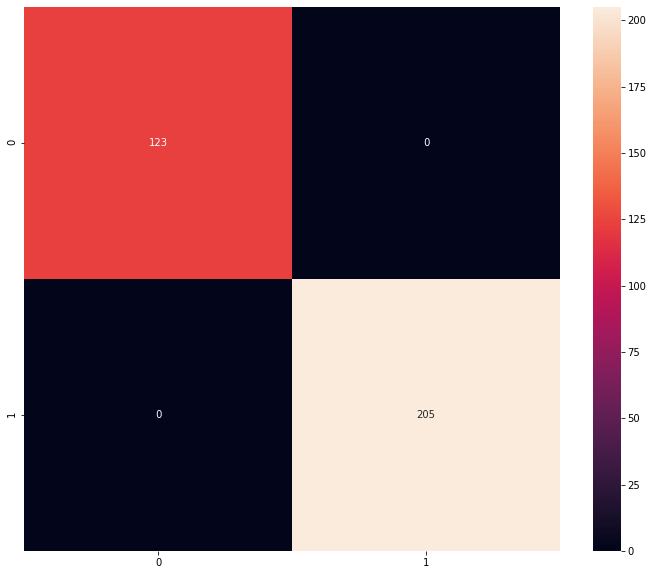

In [88]:
f,ax=plt.subplots(0,0,figsize=(12,10))

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=20),X1_train,y1_train,cv=10)
sns.heatmap(confusion_matrix(y1_train,y_pred),annot=True,fmt='2.0f')

In [89]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=50)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X1_train,y1_train)

y1_predB=clf.predict(X1_test)

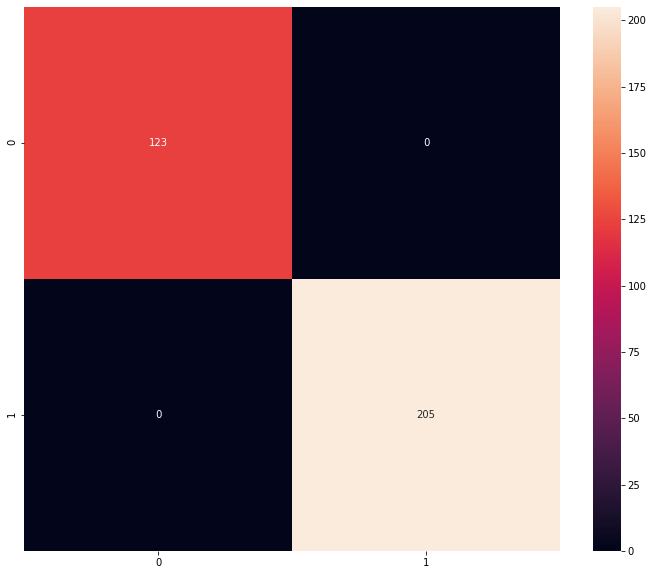

In [90]:
f,ax=plt.subplots(0,0,figsize=(12,10))

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=50),X1_train,y1_train,cv=10)
sns.heatmap(confusion_matrix(y1_train,y_pred),annot=True,fmt='2.0f')


In [91]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_test, y1_predB))
print("f1 score:",f1_score(y1_test, y1_predB, zero_division=1))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y1_test, y1_predB, average='macro'))


Accuracy: 0.9929078014184397
f1 score: 0.9948717948717948
precision, recall, F-measure and support: (0.9886363636363636, 0.9948979591836735, 0.9916887709991158, None)


In [92]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=70)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X1_train,y1_train)

y1_predC=clf.predict(X1_test)

In [93]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_test, y1_predC))
print("f1 score:",f1_score(y1_test, y1_predC, zero_division=1))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y1_test, y1_predC, average='macro'))


Accuracy: 0.9929078014184397
f1 score: 0.9948717948717948
precision, recall, F-measure and support: (0.9886363636363636, 0.9948979591836735, 0.9916887709991158, None)


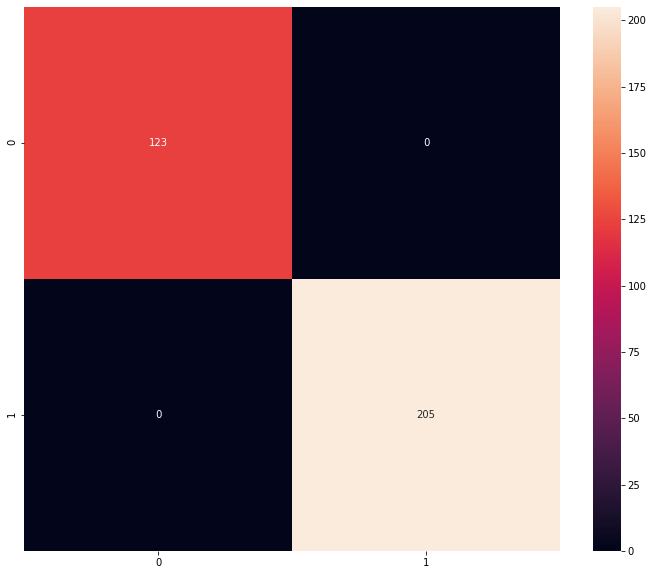

In [94]:
f,ax=plt.subplots(0,0,figsize=(12,10))

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=70),X1_train,y1_train,cv=10)
sns.heatmap(confusion_matrix(y1_train,y_pred),annot=True,fmt='2.0f')

In [95]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X1_train,y1_train)

y1_predD=clf.predict(X1_test)

In [96]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_test, y1_predD))
print("f1 score:",f1_score(y1_test, y1_predD, zero_division=1))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y1_test, y1_predD, average='macro'))


Accuracy: 0.9929078014184397
f1 score: 0.9948717948717948
precision, recall, F-measure and support: (0.9886363636363636, 0.9948979591836735, 0.9916887709991158, None)


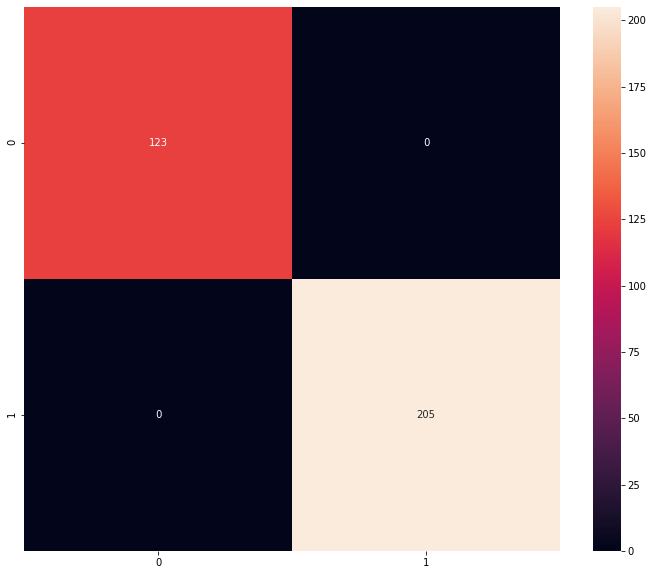

In [97]:
f,ax=plt.subplots(0,0,figsize=(12,10))

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X1_train,y1_train,cv=10)
sns.heatmap(confusion_matrix(y1_train,y_pred),annot=True,fmt='2.0f')

In [98]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=20)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X2_train,y2_train)

y2_predA=clf.predict(X2_test)

In [99]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y2_test, y2_predA))
print("f1 score:",f1_score(y2_test, y2_predA, zero_division=1))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y2_test, y2_predA, average='macro'))


Accuracy: 0.5460992907801419
f1 score: 0.6701030927835051
precision, recall, F-measure and support: (0.47466216216216217, 0.4787581699346405, 0.4714151827553889, None)


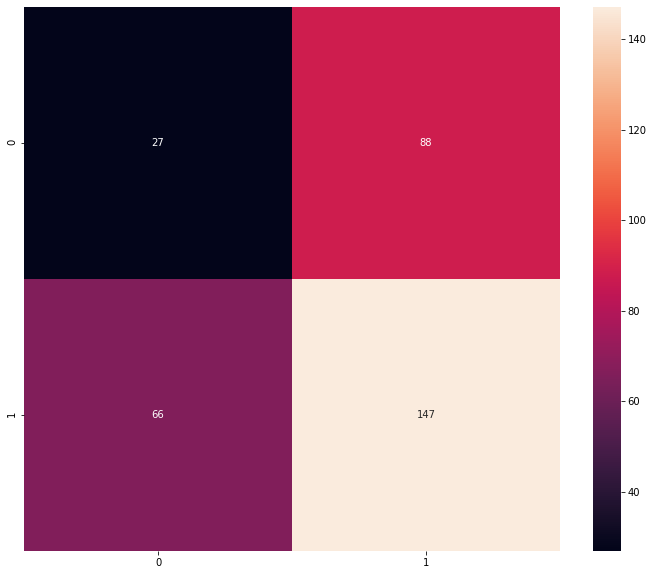

In [100]:
f,ax=plt.subplots(0,0,figsize=(12,10))

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=20),X2_train,y2_train,cv=10)
sns.heatmap(confusion_matrix(y2_train,y_pred),annot=True,fmt='2.0f')

In [101]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=50)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X2_train,y2_train)

y2_predB=clf.predict(X2_test)

In [102]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y2_test, y2_predB))
print("f1 score:",f1_score(y2_test, y2_predB, zero_division=1))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y2_test, y2_predB, average='macro'))


Accuracy: 0.5390070921985816
f1 score: 0.6766169154228855
precision, recall, F-measure and support: (0.4396396396396396, 0.4562091503267974, 0.43707388981020817, None)


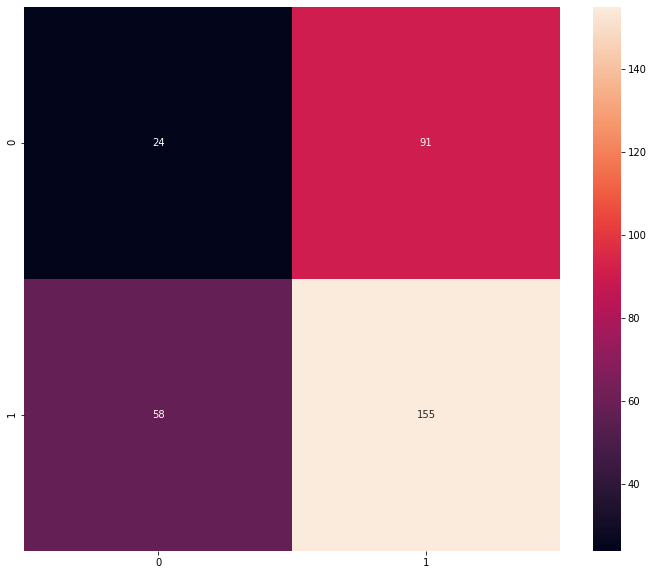

In [103]:
f,ax=plt.subplots(0,0,figsize=(12,10))

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=50),X2_train,y2_train,cv=10)
sns.heatmap(confusion_matrix(y2_train,y_pred),annot=True,fmt='2.0f')

In [104]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=70)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X2_train,y2_train)

y2_predC=clf.predict(X2_test)

In [105]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y2_test, y2_predC))
print("f1 score:",f1_score(y2_test, y2_predC, zero_division=1))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y2_test, y2_predC, average='macro'))


Accuracy: 0.5177304964539007
f1 score: 0.6633663366336635
precision, recall, F-measure and support: (0.4025554187192118, 0.43104575163398695, 0.40668316831683177, None)


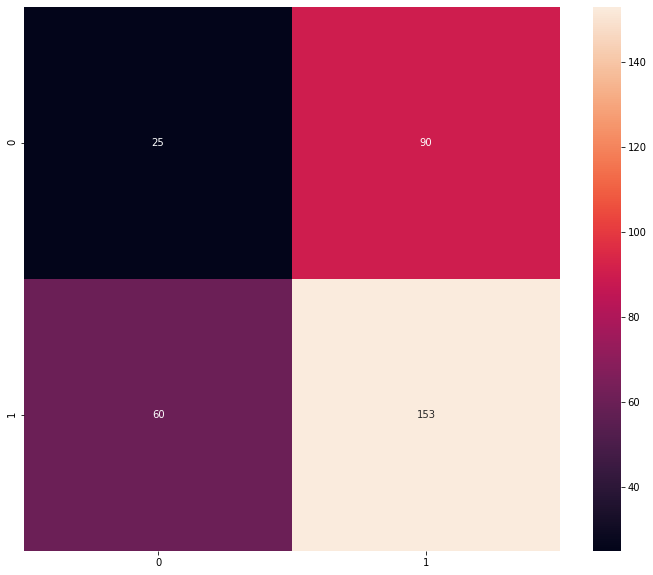

In [106]:
f,ax=plt.subplots(0,0,figsize=(12,10))

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=70),X2_train,y2_train,cv=10)
sns.heatmap(confusion_matrix(y2_train,y_pred),annot=True,fmt='2.0f')

In [107]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X2_train,y2_train)

y2_predD=clf.predict(X2_test)

In [108]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y2_test, y2_predD))
print("f1 score:",f1_score(y2_test, y2_predD, zero_division=1))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y2_test, y2_predD, average='macro'))


Accuracy: 0.5673758865248227
f1 score: 0.6965174129353233
precision, recall, F-measure and support: (0.48198198198198194, 0.4869281045751634, 0.47171549659111844, None)


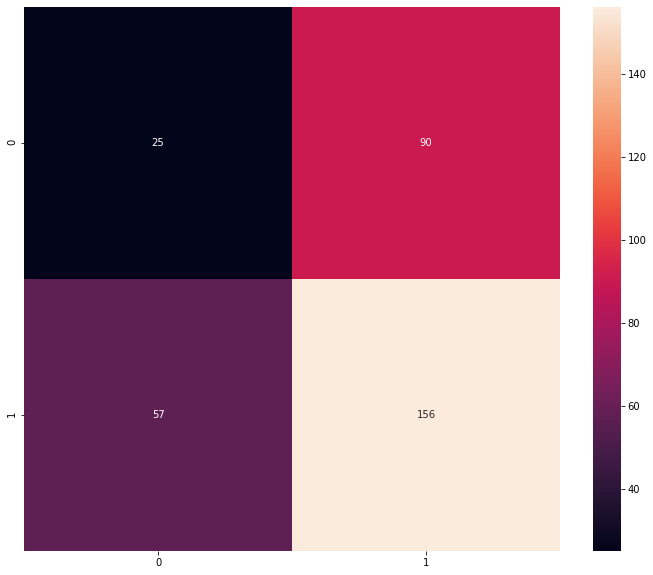

In [109]:
f,ax=plt.subplots(0,0,figsize=(12,10))

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X2_train,y2_train,cv=10)
sns.heatmap(confusion_matrix(y2_train,y_pred),annot=True,fmt='2.0f')

# Using Naive Bayes for Data with Fasting Blood Glucose


In [110]:
from sklearn.naive_bayes import GaussianNB

In [111]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X1_train, y1_train)

#Predict the response for test dataset
y1_pred = gnb.predict(X1_test)

In [112]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))
print("f1 score:",f1_score(y1_test, y1_pred, zero_division=1))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y1_test, y1_pred, average='macro'))


Accuracy: 0.9929078014184397
f1 score: 0.9948717948717948
precision, recall, F-measure and support: (0.9886363636363636, 0.9948979591836735, 0.9916887709991158, None)


# Using Naive Bayes for Data without Fasting Blood Glucose

In [113]:
from sklearn.naive_bayes import GaussianNB

In [114]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X2_train, y2_train)

#Predict the response for test dataset
y2_pred = gnb.predict(X2_test)

In [115]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))
print("f1 score:",f1_score(y2_test, y2_pred, zero_division=1))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y2_test, y2_pred, average='macro'))


Accuracy: 0.524822695035461
f1 score: 0.567741935483871
precision, recall, F-measure and support: (0.53582995951417, 0.538562091503268, 0.5200914401828804, None)


# USING SUPPORT VECTOR MACHINE ON DATA WITH FASTING BLOOD GLUCOSE

In [116]:
from sklearn.svm import SVC
svclassifier_1 = SVC(kernel='linear')
svclassifier_1.fit(X1_train, y1_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [117]:
y1_pred_SVM = svclassifier_1.predict(X1_test)

In [118]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred_SVM))
print("f1 score:",f1_score(y1_test, y1_pred_SVM, zero_division=1))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y1_test, y1_pred_SVM, average='macro'))


Accuracy: 0.9929078014184397
f1 score: 0.9948717948717948
precision, recall, F-measure and support: (0.9886363636363636, 0.9948979591836735, 0.9916887709991158, None)


# USING SUPPORT VECTOR MACHINE ON DATA WITHOUTH FASTING BLOOD GLUCOSE


In [119]:
from sklearn.svm import SVC
svclassifier_1 = SVC(kernel='linear')
svclassifier_1.fit(X2_train, y2_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [120]:
y2_pred_SVM = svclassifier_1.predict(X2_test)

In [121]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred_SVM))
print("f1 score:",f1_score(y2_test, y2_pred_SVM, zero_division=1))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y2_test, y2_pred_SVM, average='macro'))


Accuracy: 0.6382978723404256
f1 score: 0.7792207792207793
precision, recall, F-measure and support: (0.3191489361702128, 0.5, 0.38961038961038963, None)


/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# USING DECISION TREE ON DATA WITHOUTH FASTING BLOOD GLUCOSE


In [122]:
from sklearn.tree import DecisionTreeClassifier

In [123]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X1_train, y1_train)

#Predict the response for test dataset
y_pred = clf.predict(X1_test)

In [124]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_test, y_pred))
print("f1 score:",f1_score(y1_test, y_pred, zero_division=1))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y1_test, y_pred, average='macro'))


Accuracy: 0.9929078014184397
f1 score: 0.9948717948717948
precision, recall, F-measure and support: (0.9886363636363636, 0.9948979591836735, 0.9916887709991158, None)


# USING DECISION TREE ON DATA WITHOUTH FASTING BLOOD GLUCOSE


In [125]:
from sklearn.tree import DecisionTreeClassifier

In [126]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X2_train, y2_train)

#Predict the response for test dataset
y_pred = clf.predict(X2_test)

In [127]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y2_test, y_pred))
print("f1 score:",f1_score(y2_test, y2_pred, zero_division=1))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y2_test, y2_pred, average='macro'))


Accuracy: 0.48936170212765956
f1 score: 0.567741935483871
precision, recall, F-measure and support: (0.53582995951417, 0.538562091503268, 0.5200914401828804, None)


# USING K NEAREST NEIGBOUR CLASSIFIER ON DATA WITH FASTING BLOOD GLUCOSE

In [128]:
from sklearn.neighbors import KNeighborsClassifier 

In [129]:
model = KNeighborsClassifier() 
model.fit(X1_train,y1_train)
y_pred = model.predict(X1_test)

In [130]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_test, y_pred))
print("f1 score:",f1_score(y1_test, y_pred, zero_division=1))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y1_test, y_pred, average='macro'))


Accuracy: 0.9787234042553191
f1 score: 0.9844559585492229
precision, recall, F-measure and support: (0.9673913043478262, 0.9846938775510203, 0.9753740466903418, None)


# USING K NEAREST NEIGBOUR CLASSIFIER ON DATA WITHOUT FASTING BLOOD GLUCOSE

In [131]:
from sklearn.neighbors import KNeighborsClassifier 

In [132]:
model = KNeighborsClassifier() 
model.fit(X2_train,y2_train)
y_pred = model.predict(X2_test)

In [133]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y2_test, y_pred))
print("f1 score:",f1_score(y2_test, y_pred, zero_division=1))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y2_test, y_pred, average='macro'))


Accuracy: 0.5460992907801419
f1 score: 0.673469387755102
precision, recall, F-measure and support: (0.46846361185983826, 0.4745098039215686, 0.46464167062173706, None)
